In [1]:
from utils import *

# Import Data

In [2]:
data_orig = pd.read_csv("Training_Data.csv")

In [3]:
data_orig

Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_engineer                 Rewa   
1                 no   Software_Developer             Parbhani   
2                 no     Technical_writer            Alappuzha   
3                yes   Software_Developer          Bhubaneswar   
4                 no        Civil_servant  Tiruchirappalli[10]   
...              ...                  ...                  ...   
251995            no              Surgeon              Kolkata   
251996            no         Army_officer                 Rewa   
251997            no      Design_Engineer      Kalyan-Dombivli   
251998            no     Graphic_Designer          Pondicherry   
251999            no         Statistician                Avadi   

                 STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0       Madhya_Pradesh                3                 13          0  
1          Maharashtra                9                 13          0  
2               Kerala                4                 10          0  
3               Odisha                2                 12          1  
4           Tamil_Nadu                3                 14          1  
...                ...              ...                ...        ...  
251995     West_Bengal                6                 11          0  
251996  Madhya_Pradesh                6                 11          0  
251997     Maharashtra                7                 12          0  
251998      Puducherry                0                 10          0  
251999      Tamil_Nadu                7                 11          0  

[252000 rows x 13 columns]

In [4]:
# for reducing faults in typing column names
data_orig.columns = data_orig.columns.str.lower()
data_orig.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

# preprocessing

In [5]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 252000 non-null  int64 
 1   income             252000 non-null  int64 
 2   age                252000 non-null  int64 
 3   experience         252000 non-null  int64 
 4   married/single     252000 non-null  object
 5   house_ownership    252000 non-null  object
 6   car_ownership      252000 non-null  object
 7   profession         252000 non-null  object
 8   city               252000 non-null  object
 9   state              252000 non-null  object
 10  current_job_yrs    252000 non-null  int64 
 11  current_house_yrs  252000 non-null  int64 
 12  risk_flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
# remove the id column as it not required for final modeling(unique)
data_orig.drop(["id"], axis = 1,inplace = True)

## Handle missing values

In [7]:
# checking for null values 

data_orig.isna().sum()

income               0
age                  0
experience           0
married/single       0
house_ownership      0
car_ownership        0
profession           0
city                 0
state                0
current_job_yrs      0
current_house_yrs    0
risk_flag            0
dtype: int64

## Handle duplicate data

In [8]:
data_orig.duplicated().sum()

208810

In [9]:
data_orig.drop_duplicates(inplace = True)

In [10]:
data_orig.shape

(43190, 12)

## Handle categorical data

### Lets look into  city feature values

In [11]:
# lets look into  city feature values 

data_orig["city"].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [12]:
# lets look into  state feature values 

data_orig["state"].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [13]:
# removing extra symbols
data_orig.city = data_orig.city.str.extract("([A-Za-z]+)")
data_orig.state = data_orig.state.str.extract("([A-Za-z]+)")

In [14]:
data_orig["married/single"].unique()

array(['single', 'married'], dtype=object)

In [15]:
data_orig["house_ownership"].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [16]:
data_orig['house_ownership'].value_counts()

house_ownership
rented          39679
owned            2244
norent_noown     1267
Name: count, dtype: int64

In [17]:
data_orig["car_ownership"].unique()

array(['no', 'yes'], dtype=object)

In [18]:
data_orig["profession"].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

### Encode categorical features

In [19]:
data = data_orig.copy()

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# considering house ownership with three values an ordinal feature for encoding
ordinal_encoder = OrdinalEncoder(categories=[['norent_noown', 'rented', 'owned']])
data['house_ownership'] = ordinal_encoder.fit_transform(data[['house_ownership']])

In [21]:
data['house_ownership'].value_counts()

house_ownership
1.0    39679
2.0     2244
0.0     1267
Name: count, dtype: int64

In [23]:
# encoding married/single, car_ownership as binary features
Binary_mapping_ms = {'single': 0, 'married': 1}
data["married/single"] = data["married/single"].map(Binary_mapping_ms)

In [24]:
Binary_mapping_co = {'no': 0, 'yes': 1}
data["car_ownership"] = data["car_ownership"].map(Binary_mapping_co)

In [25]:
# between possible ways to handle city, state and profession with numerous values, we chose to use targetencoder
# which uses target value mean for each categorical data 

## the reasoning for this is to keep the collected data and use it for more effective presence and it wont cause any Geographical injustice

In [26]:
import category_encoders as ce
import warnings


# Ignore FutureWarnings from category_encoders
warnings.filterwarnings("ignore", category=FutureWarning, module="category_encoders")

encoder = ce.TargetEncoder(cols=['city'])
data['city'] = encoder.fit_transform(data['city'], data['risk_flag'])

In [27]:
encoder = ce.TargetEncoder(cols=['profession'])
data['profession'] = encoder.fit_transform(data['profession'], data['risk_flag'])

In [28]:
encoder = ce.TargetEncoder(cols=['state'])
data['state'] = encoder.fit_transform(data['state'], data['risk_flag'])

#### Explanation : between possible ways to handle city, state and profession with numerous values, we chose to use targetencoder which uses target value mean for each categorical data the reasoning for this is to keep the collected data and use it for more effective presence and it wont cause any Geographical injustice

#### now we have a default value based on the target feature means for each city, state and profession 
#### which we will use for all future data entries as a numerical value instead of the city, state and profession declared by Loan applicant  in order to handle these categorical features without adding new features to the dataset or removing them which can be helpful for our predictions.
#### these default values can be changed in the future if we add new records to our training dataset for our model to learn.

In [29]:
data

income  age  experience  married/single  house_ownership  \
0       1303834   23           3               0              1.0   
1       7574516   40          10               0              1.0   
2       3991815   66           4               1              1.0   
3       6256451   41           2               0              1.0   
4       5768871   47          11               0              1.0   
...         ...  ...         ...             ...              ...   
251995  8154883   43          13               0              1.0   
251996  2843572   26          10               0              1.0   
251997  4522448   46           7               0              1.0   
251998  6507128   45           0               0              1.0   
251999  9070230   70          17               0              1.0   

        car_ownership  profession      city     state  current_job_yrs  \
0                   0    0.177289  0.217391  0.199349                3   
1                   0    0.201835  0.214285  0.193318                9   
2                   0    0.195780  0.168001  0.217742                4   
3                   1    0.201835  0.294572  0.199284                2   
4                   0    0.189315  0.168919  0.205274                3   
...               ...         ...       ...       ...              ...   
251995              0    0.200762  0.177305  0.185139                6   
251996              0    0.214732  0.217391  0.199349                6   
251997              0    0.199528  0.227586  0.193318                7   
251998              0    0.211738  0.244444  0.232824                0   
251999              0    0.170429  0.246376  0.205274                7   

        current_house_yrs  risk_flag  
0                      13          0  
1                      13          0  
2                      10          0  
3                      12          1  
4                      14          1  
...                   ...        ...  
251995                 11          0  
251996                 11          0  
251997                 12          0  
251998                 10          0  
251999                 11          0  

[43190 rows x 12 columns]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43190 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   income             43190 non-null  int64  
 1   age                43190 non-null  int64  
 2   experience         43190 non-null  int64  
 3   married/single     43190 non-null  int64  
 4   house_ownership    43190 non-null  float64
 5   car_ownership      43190 non-null  int64  
 6   profession         43190 non-null  float64
 7   city               43190 non-null  float64
 8   state              43190 non-null  float64
 9   current_job_yrs    43190 non-null  int64  
 10  current_house_yrs  43190 non-null  int64  
 11  risk_flag          43190 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 4.3 MB


## Handle Outlier Data

<Axes: >

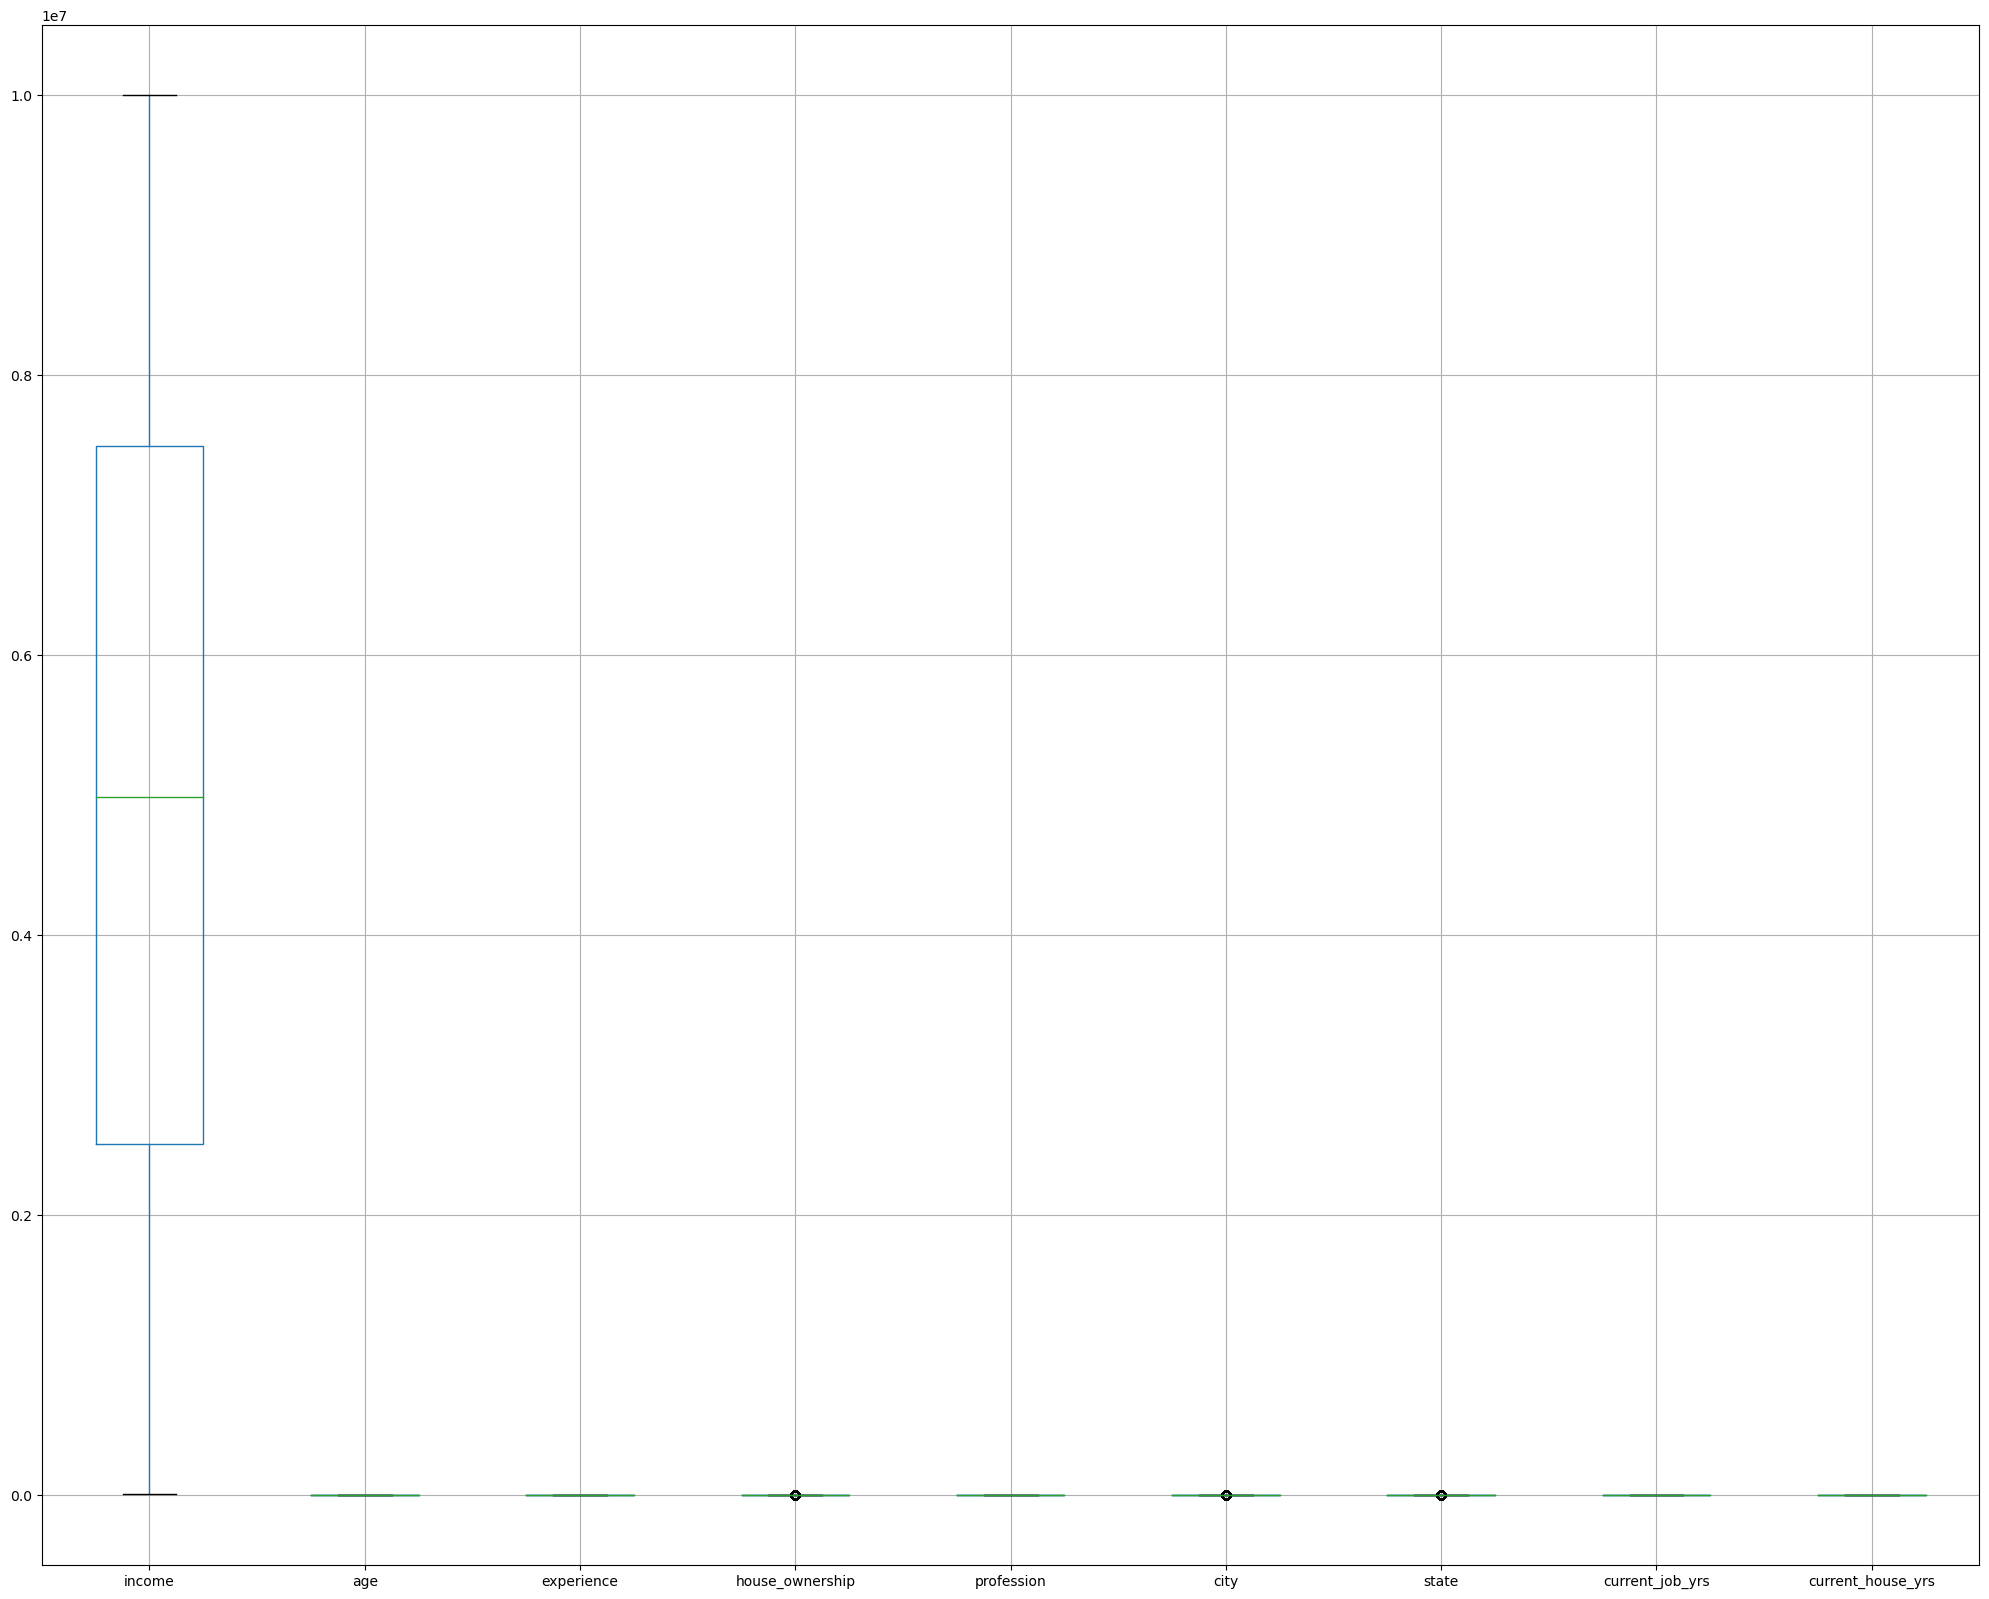

In [31]:
plt.figure(figsize=(25,20))
data.iloc[:,[0,1,2,4,6,7,8,9,10]].boxplot()

<Axes: >

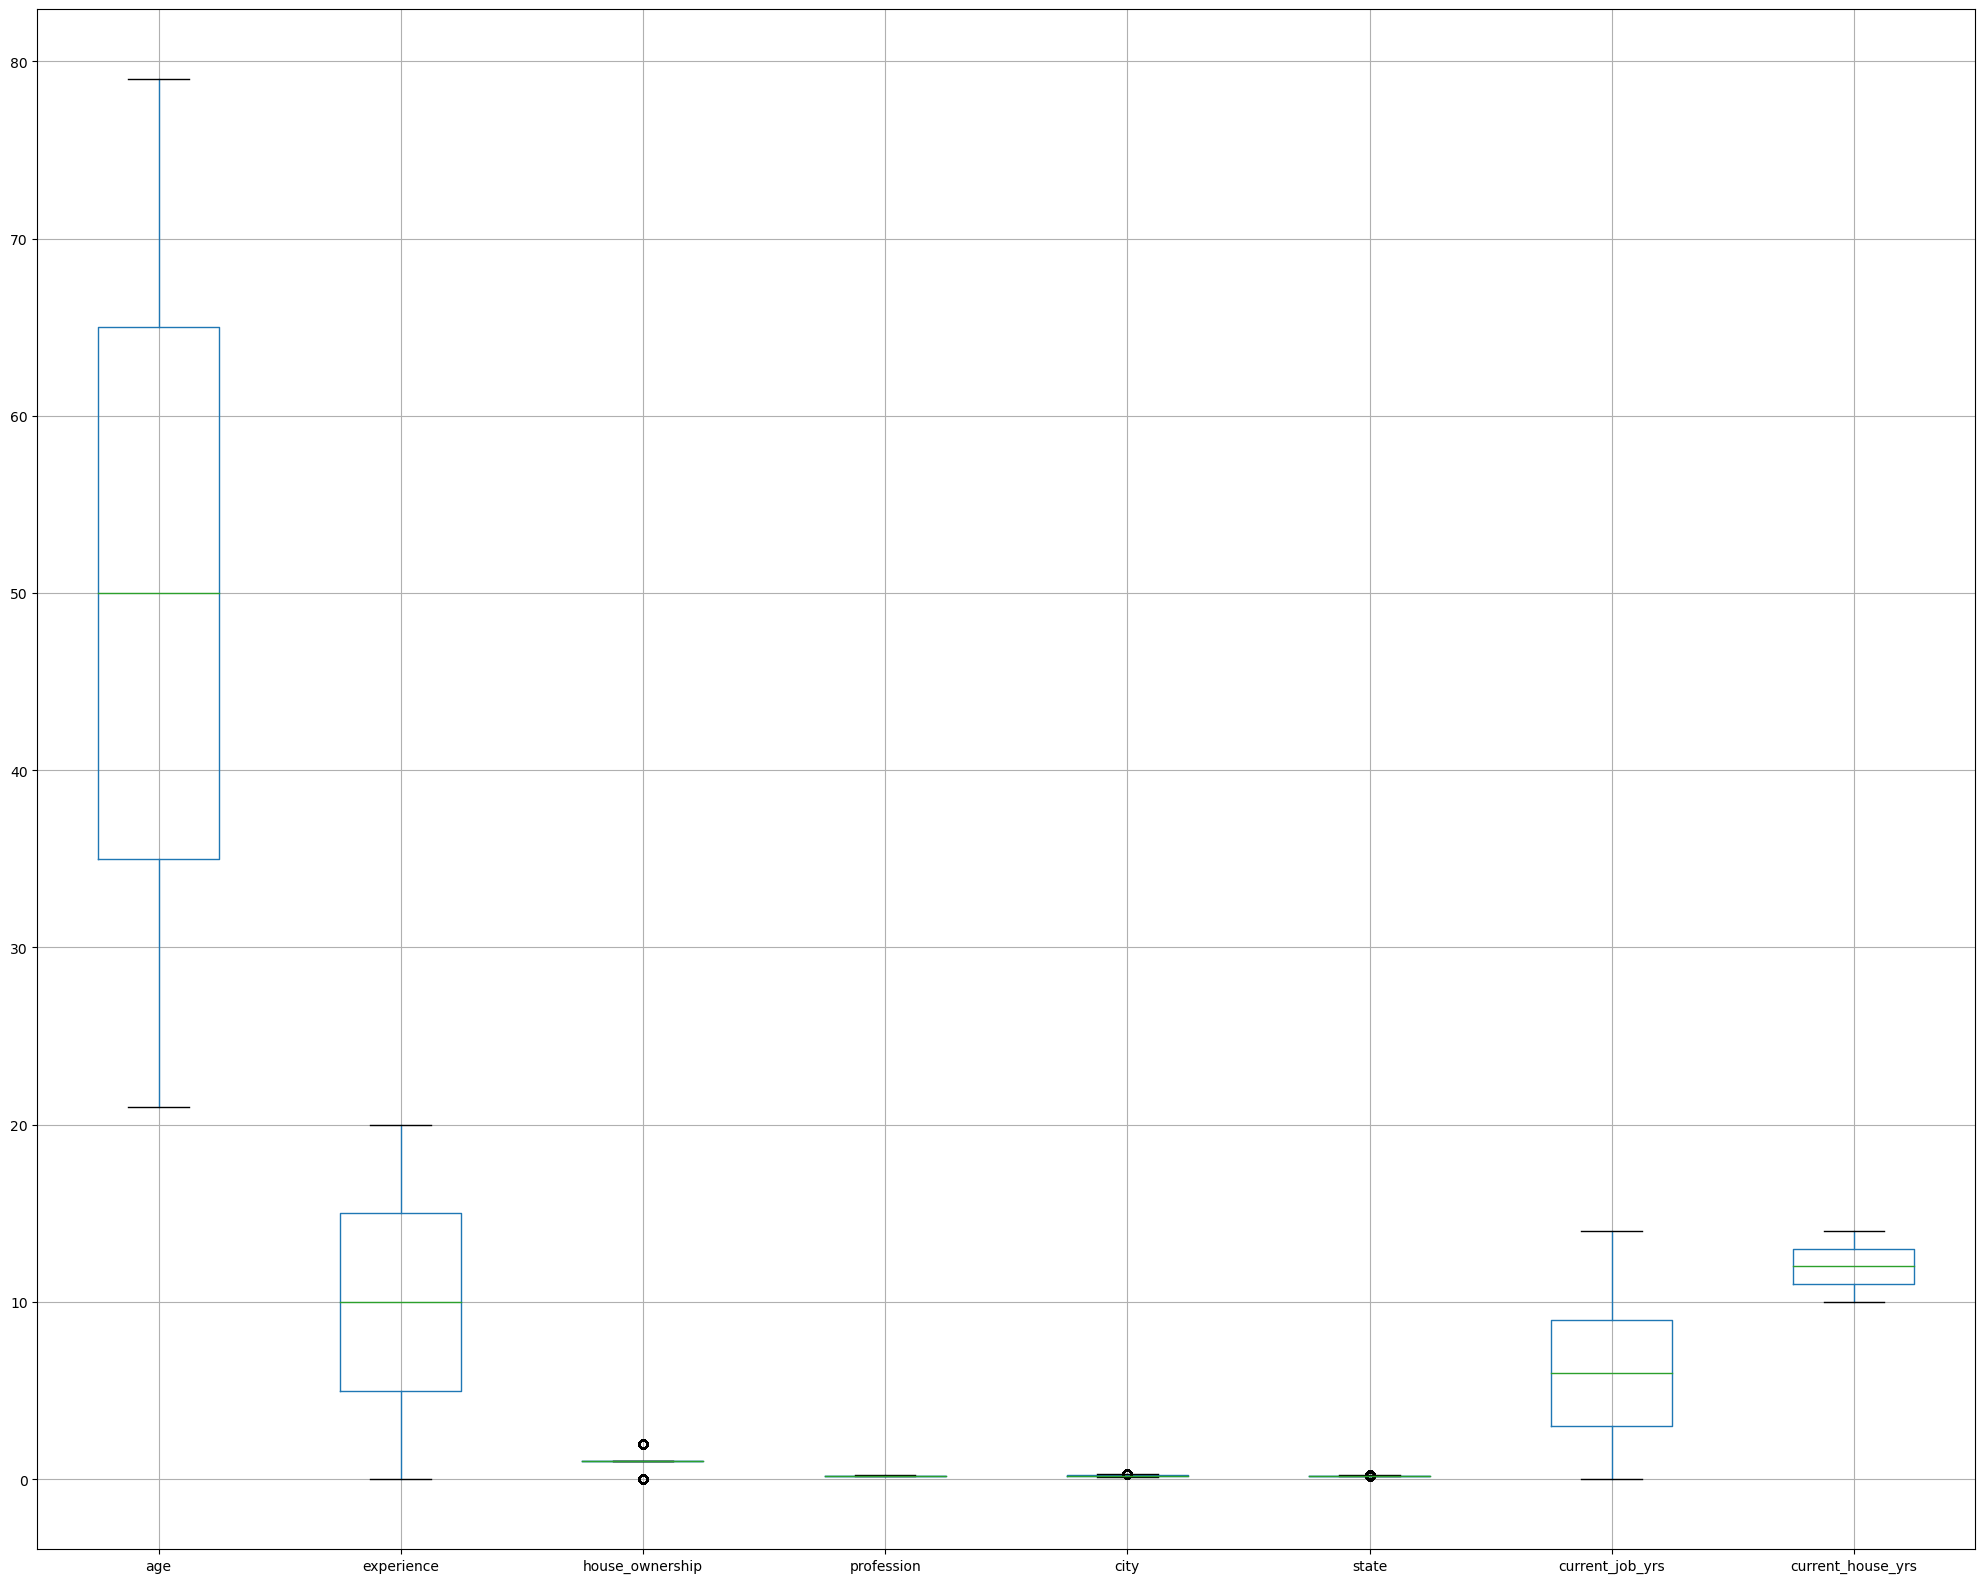

In [32]:
plt.figure(figsize=(25,20))
data.iloc[:,[1,2,4,6,7,8,9,10]].boxplot()

<Axes: >

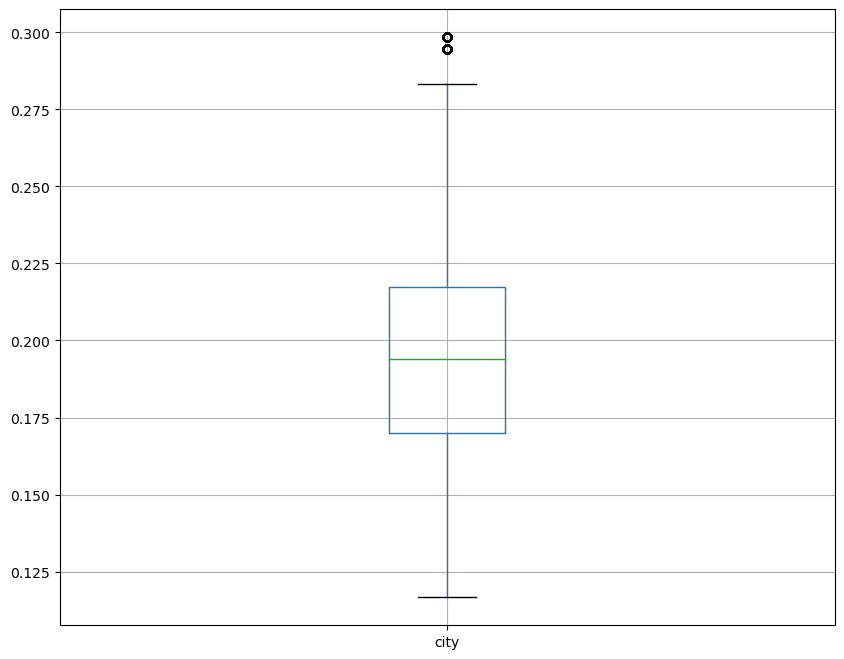

In [33]:
plt.figure(figsize=(10,8))
data.iloc[:,[7]].boxplot()

In [34]:
Q1 = data.iloc[:,7].quantile(0.25)
Q3 = data.iloc[:,7].quantile(0.75)

LB_7 = Q1 - 1.5 * (Q3 - Q1)
UB_7 = Q3 + 1.5 * (Q3 - Q1)

print(LB_7,UB_7)

0.09874999833840735 0.2885758249208361


In [35]:
upper_7 = data[data['city'] > UB_7 ].index
lower_7 = data[data['city'] < LB_7 ].index
print("upper_indexes : ",upper_7 ,"\nlower_indexes : ",lower_7)

upper_indexes :  Index([     3,    582,    609,    699,    754,    964,   1356,   1476,   1932,
         2480,
       ...
       249277, 249347, 249562, 249782, 250442, 250888, 250958, 251119, 251315,
       251959],
      dtype='int64', length=253) 
lower_indexes :  Index([], dtype='int64')


In [36]:
data_orig["city"].loc[upper_7].unique()

array(['Bhubaneswar', 'Yamunanagar'], dtype=object)

<Axes: >

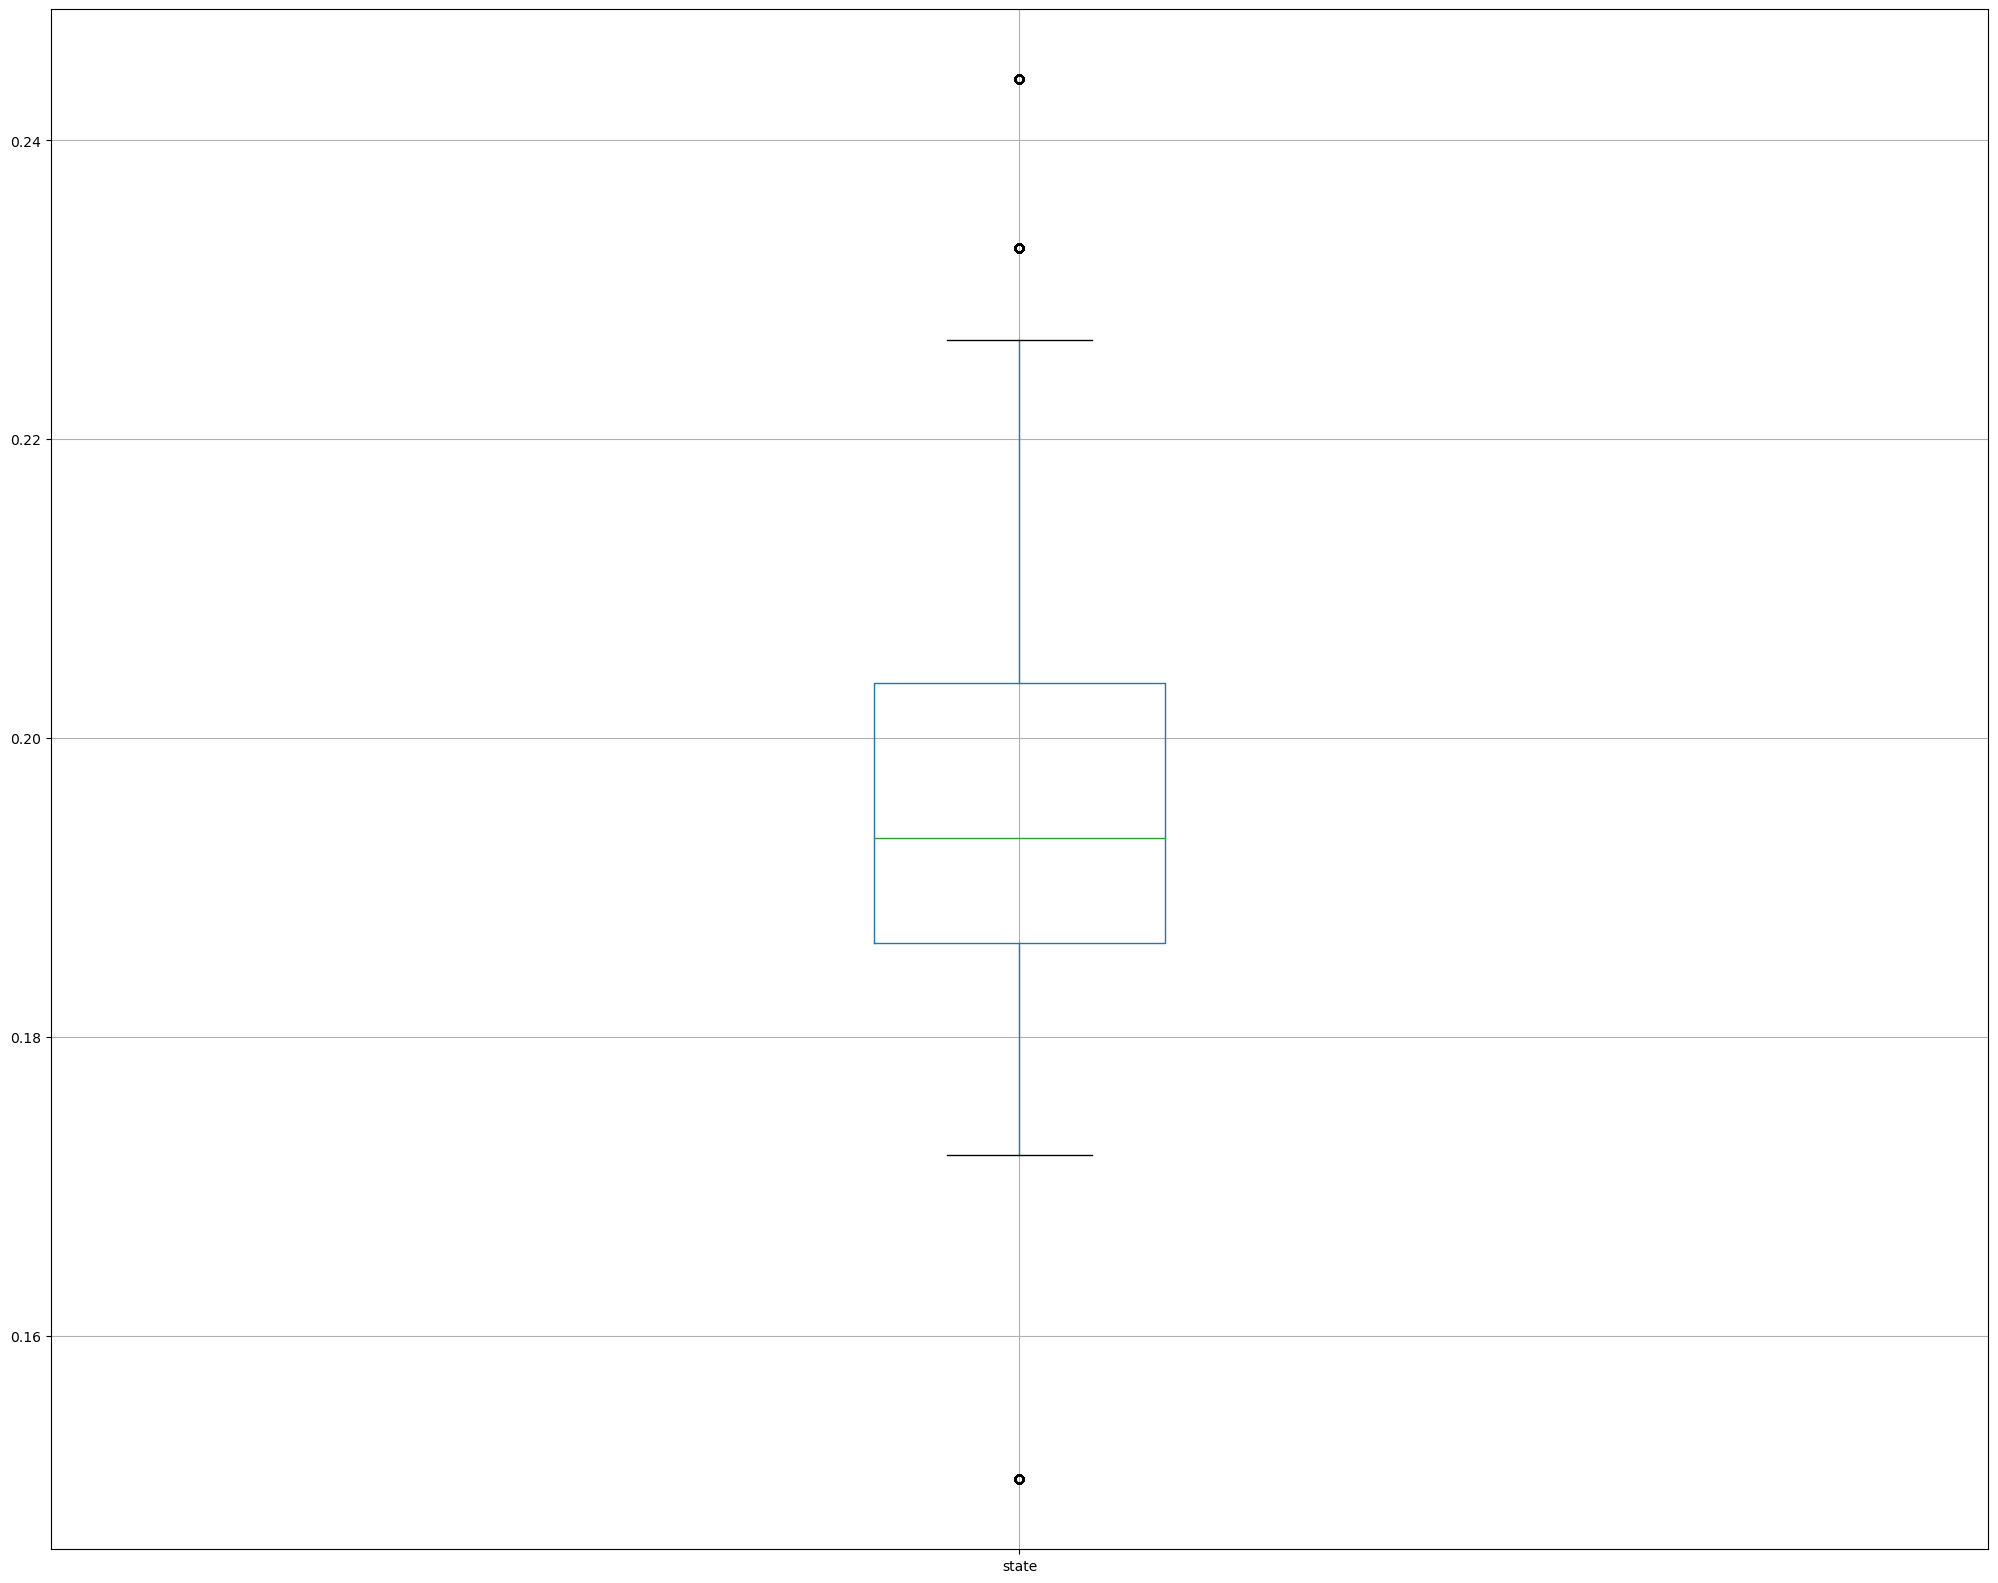

In [37]:
plt.figure(figsize=(25,20))
data.iloc[:,[8]].boxplot()

In [38]:
Q1 = data.iloc[:,8].quantile(0.25)
Q3 = data.iloc[:,8].quantile(0.75)

LB_8 = Q1 - 1.5 * (Q3 - Q1)
UB_8 = Q3 + 1.5 * (Q3 - Q1)

print(LB_8,UB_8)

0.1602392666843599 0.22973820849410337


In [39]:
upper_8 = data[data['state'] > UB_8].index
lower_8 = data[data['state'] < LB_8 ].index
print("upper_indexes : ",upper_8 ,"\nlower_indexes : ",lower_8)

upper_indexes :  Index([    28,    141,    184,    355,    650,    702,    811,    963,    984,
         1080,
       ...
       251189, 251259, 251277, 251381, 251717, 251862, 251948, 251954, 251967,
       251998],
      dtype='int64', length=389) 
lower_indexes :  Index([    75,    445,    487,    613,   1163,   1260,   1282,   1610,   1614,
         2621,
       ...
       248513, 248829, 249499, 249557, 250103, 250183, 250917, 251193, 251595,
       251974],
      dtype='int64', length=133)


In [40]:
data_orig["state"].loc[upper_8].unique()

array(['Puducherry', 'Manipur'], dtype=object)

In [41]:
data_orig["state"].loc[lower_8].unique()

array(['Mizoram'], dtype=object)

# Feature engineering

#### adding two new features based on the data

In [42]:
# data_2 = data.copy()


In [43]:
# data_2['jobless_years'] = data_2['age'] - data_2['experience'] - 18
# data_2['other_Profession_years'] = data_2['experience'] - data_2['current_job_yrs']

# Handle imbalance data

In [45]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

#### in this section we use three different methods to balance our data in order to use it in models

In [46]:
data.iloc[:,[-1]].value_counts()

risk_flag
0            34747
1             8443
Name: count, dtype: int64

### Apply SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

#build SMOTE
smote = SMOTE()

#fit predictor and target variables
x_smote, y_smote = smote.fit_resample(X,y)

print("Original dataset shape", y.shape)
print("Resmaple dataset shape", y_smote.shape)

Original dataset shape (43190,)
Resmaple dataset shape (69494,)


In [48]:
smote_data = pd.concat([pd.DataFrame(x_smote), pd.Series(y_smote, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)
smote_data

income  age  experience  married/single  house_ownership  \
0      1303834   23           3               0         1.000000   
1      7574516   40          10               0         1.000000   
2      3991815   66           4               1         1.000000   
3      6256451   41           2               0         1.000000   
4      5768871   47          11               0         1.000000   
...        ...  ...         ...             ...              ...   
69489  8381899   68           1               0         1.000000   
69490  4855348   56          13               0         1.000000   
69491  1983264   64           5               0         1.000000   
69492  5695879   43           8               0         1.000000   
69493    29282   70           3               0         0.274252   

       car_ownership  profession      city     state  current_job_yrs  \
0                  0    0.177289  0.217391  0.199349                3   
1                  0    0.201835  0.214285  0.193318                9   
2                  0    0.195780  0.168001  0.217742                4   
3                  1    0.201835  0.294572  0.199284                2   
4                  0    0.189315  0.168919  0.205274                3   
...              ...         ...       ...       ...              ...   
69489              1    0.210103  0.215140  0.185139                1   
69490              0    0.216346  0.206709  0.187732                6   
69491              0    0.179284  0.181661  0.189455                5   
69492              0    0.194346  0.236254  0.199473                6   
69493              0    0.201972  0.227071  0.209381                3   

       current_house_yrs  risk_flag  
0                     13          0  
1                     13          0  
2                     10          0  
3                     12          1  
4                     14          1  
...                  ...        ...  
69489                 11          1  
69490                 11          1  
69491                 13          1  
69492                 11          1  
69493                 12          1  

[69494 rows x 12 columns]

### Apply under sampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler


In [50]:
# Checking the class distribution before undersampling
print("Class distribution before undersampling:")
print(data['risk_flag'].value_counts())

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

Class distribution before undersampling:
risk_flag
0    34747
1     8443
Name: count, dtype: int64


In [51]:
undersampled_data = pd.concat([pd.DataFrame(X_undersampled), pd.Series(y_undersampled, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)
# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(undersampled_data['risk_flag'].value_counts())


Class distribution after undersampling:
risk_flag
0    8443
1    8443
Name: count, dtype: int64


In [52]:
undersampled_data

income  age  experience  married/single  house_ownership  \
0      4859415   23          13               0              1.0   
1      6049428   63           0               0              1.0   
2      5021226   34          15               0              1.0   
3      5213502   73          19               0              2.0   
4      3312672   22          15               0              1.0   
...        ...  ...         ...             ...              ...   
16881  1244622   35          15               0              1.0   
16882  1330613   63          19               0              1.0   
16883  1796713   47           2               0              1.0   
16884  3182290   52           2               0              1.0   
16885  8141027   60          10               0              1.0   

       car_ownership  profession      city     state  current_job_yrs  \
0                  0    0.195444  0.148438  0.193413               10   
1                  1    0.194896  0.187500  0.193318                0   
2                  0    0.187879  0.187050  0.190582                7   
3                  1    0.204152  0.211268  0.199566                5   
4                  0    0.195730  0.243243  0.190582                8   
...              ...         ...       ...       ...              ...   
16881              0    0.224880  0.169811  0.193413                3   
16882              0    0.203585  0.173555  0.180386               13   
16883              0    0.218859  0.187919  0.193318                2   
16884              0    0.190260  0.194444  0.185139                2   
16885              0    0.185579  0.195652  0.193318                9   

       current_house_yrs  risk_flag  
0                     13          0  
1                     13          0  
2                     11          0  
3                     14          0  
4                     14          0  
...                  ...        ...  
16881                 11          1  
16882                 12          1  
16883                 12          1  
16884                 10          1  
16885                 13          1  

[16886 rows x 12 columns]

## Apply Smote ENN

In [53]:
from imblearn.combine import SMOTEENN
from collections import Counter
smote_enn = SMOTEENN()

X_resample_enn, y_resample_enn = smote_enn.fit_resample(X, y)
print("Original dataset shape", y.shape)
print("Resmaple dataset shape", y_resample_enn.shape)

Original dataset shape (43190,)
Resmaple dataset shape (18286,)


### Apply over/under sampling

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd



# Check the class distribution before under-sampling
print("Class distribution before under-sampling:")
print(data['risk_flag'].value_counts())

under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

X_under_sampled, y_under_sampled = under_sampler.fit_resample(X, y)

# Combine the under-sampled training data and labels into a single DataFrame
under_sampled_data = pd.concat([pd.DataFrame(X_under_sampled), pd.Series(y_under_sampled, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

# Check the class distribution after under-sampling
print("Class distribution after under-sampling:")
print(under_sampled_data['risk_flag'].value_counts())

over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_over_undersampled, y_over_undersampled = over_sampler.fit_resample(X_under_sampled, y_under_sampled)

resampled_data = pd.concat([pd.DataFrame(X_over_undersampled), pd.Series(y_over_undersampled, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)


# Check the class distribution after over-sampling
print("Class distribution after over-sampling:")
print(resampled_data['risk_flag'].value_counts())


Class distribution before under-sampling:
risk_flag
0    34747
1     8443
Name: count, dtype: int64
Class distribution after under-sampling:
risk_flag
0    16886
1     8443
Name: count, dtype: int64
Class distribution after over-sampling:
risk_flag
0    16886
1    16886
Name: count, dtype: int64


# Splitting the dataset into the Training set, Validation set and Test set

## dataset unbalanced

In [55]:
## split dataset using smote ENN
from sklearn.model_selection import train_test_split

X_train_unbalanced, X_val_unbalanced, y_train_unbalanced, y_val_unbalanced = train_test_split(X,y, test_size = 0.20, random_state = 42)
X_train_unbalanced.shape

(34552, 11)

In [56]:
data_train_unbalanced = pd.concat([pd.DataFrame(X_train_unbalanced), pd.Series(y_train_unbalanced, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

In [57]:
# this is the data set using for evaluation 
data_val_unbalanced = pd.concat([pd.DataFrame(X_val_unbalanced), pd.Series(y_val_unbalanced, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

## dataset smote ENN

In [58]:
## split dataset using smote ENN
from sklearn.model_selection import train_test_split

X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn = train_test_split(X_resample_enn,y_resample_enn, test_size = 0.20, random_state = 42)
X_train_smoteenn.shape

(14628, 11)

In [59]:
data_train_smoteenn = pd.concat([pd.DataFrame(X_train_smoteenn), pd.Series(y_train_smoteenn, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

In [60]:
# this is the data set using for evaluation 
data_val_smoteenn = pd.concat([pd.DataFrame(X_val_smoteenn), pd.Series(y_val_smoteenn, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

## dataset smote

In [61]:
## split dataset using smote
from sklearn.model_selection import train_test_split

X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(x_smote, y_smote, test_size = 0.20, random_state = 42)
X_train_smote.shape

(55595, 11)

In [62]:
data_train_smote = pd.concat([pd.DataFrame(X_train_smote), pd.Series(y_train_smote, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

In [63]:
# this is the data set using for evaluation 
data_val_smote = pd.concat([pd.DataFrame(X_val_smote), pd.Series(y_val_smote, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

## dataset Undersampled

In [64]:
## split dataset using smote
from sklearn.model_selection import train_test_split

X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled = train_test_split(X_undersampled, y_undersampled, test_size = 0.20, random_state = 42)
X_train_undersampled.shape

(13508, 11)

In [65]:
data_train_undersampled = pd.concat([pd.DataFrame(X_train_undersampled), pd.Series(y_train_undersampled, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

In [66]:
# this is the data set using for evaluation 
data_val_undersampled = pd.concat([pd.DataFrame(X_val_undersampled), pd.Series(y_val_undersampled, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

## dataset Under/Over sampled

In [67]:
## split dataset using smote
from sklearn.model_selection import train_test_split

X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled = train_test_split(X_over_undersampled, y_over_undersampled, test_size = 0.20, random_state = 42)
X_train_over_undersampled.shape

(27017, 11)

In [68]:
data_train_over_undersampled = pd.concat([pd.DataFrame(X_train_over_undersampled), pd.Series(y_train_over_undersampled, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

In [69]:
# this is the data set using for evaluation 
data_val_over_undersampledn = pd.concat([pd.DataFrame(X_val_over_undersampled), pd.Series(y_val_over_undersampled, name='risk_flag')], axis=1).reset_index().drop("index", axis = 1)

# Feature selection

### feature importance for unbalance

In [70]:
feature_selection_chi2(X, y, k=11)

feature_name  feature_score
7                city      26.754654
6          profession       4.568899
5       car_ownership       3.860605
8               state       0.992972
2          experience       0.903118
10  current_house_yrs       0.246751
1                 age       0.109773
9     current_job_yrs       0.079556
3      married/single       0.065175
0              income       0.002001
4     house_ownership       0.000291

In [71]:
feature_selection_f_classif(X, y, k=11)

Feature       Score
7                city  326.834527
6          profession   41.412545
8               state   33.977942
5       car_ownership    5.481328
2          experience    4.948322
10  current_house_yrs    0.992290
1                 age    0.632832
9     current_job_yrs    0.522696
3      married/single    0.072490
0              income    0.011998
4     house_ownership    0.007371

In [72]:
feature_selection_mutual_info_classif(X, y, k=11)

Feature     Score
4     house_ownership  0.004947
3      married/single  0.002542
7                city  0.002285
10  current_house_yrs  0.000772
2          experience  0.000768
5       car_ownership  0.000525
1                 age  0.000376
9     current_job_yrs  0.000074
0              income  0.000000
6          profession  0.000000
8               state  0.000000

In [73]:
get_most_important_features_pca(data, n_components=11)

Most_Important_Features
0                   income
1                      age
2               experience
3          current_job_yrs
4        current_house_yrs
5            car_ownership
6           married/single
7          house_ownership
8                     city
9               profession
10                   state

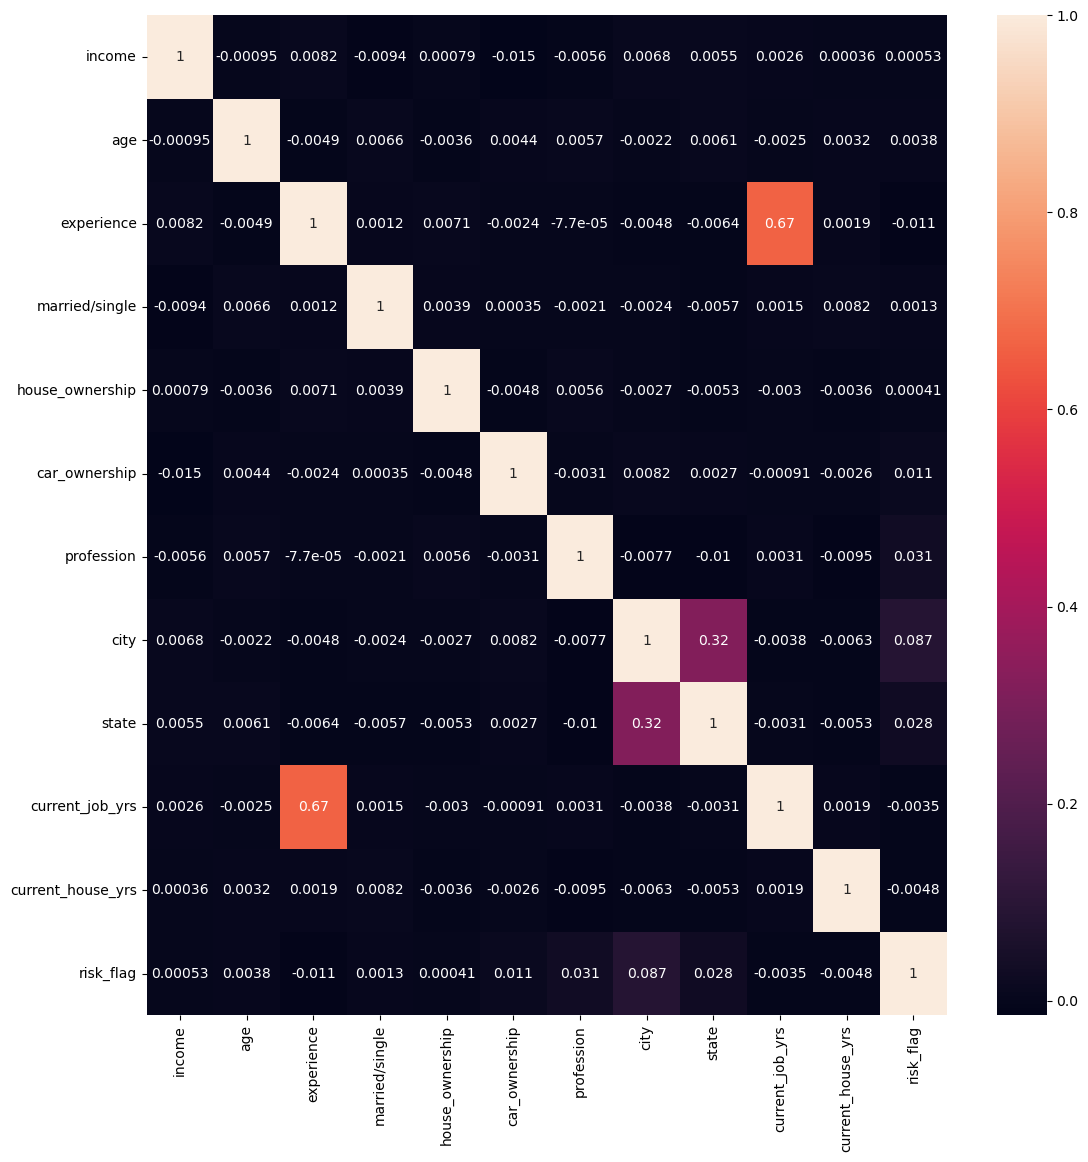

In [74]:
plot_correlation_heatmap(data)

### feature importance for smote

In [75]:
feature_selection_chi2(X_train_smote, y_train_smote, k=11)

feature_name  feature_score
5       car_ownership    1376.599413
3      married/single     985.740945
10  current_house_yrs     191.422761
7                city      55.046082
9     current_job_yrs      25.842741
2          experience      20.035223
6          profession       8.736998
8               state       2.378626
1                 age       0.989524
0              income       0.121663
4     house_ownership       0.020518

In [76]:
feature_selection_f_classif(X_train_smote, y_train_smote, k=11)

Feature        Score
5       car_ownership  1821.718237
3      married/single  1075.248069
10  current_house_yrs   802.093143
7                city   790.253204
9     current_job_yrs   187.682328
2          experience   122.132055
8               state    93.314601
6          profession    91.964276
1                 age     6.515587
0              income     0.730290
4     house_ownership     0.587075

In [77]:
feature_selection_mutual_info_classif(X_train_smote, y_train_smote, k=11)

Feature     Score
6          profession  0.373696
7                city  0.366489
8               state  0.348922
0              income  0.100094
4     house_ownership  0.050700
10  current_house_yrs  0.019676
5       car_ownership  0.018710
1                 age  0.015407
2          experience  0.012293
9     current_job_yrs  0.008415
3      married/single  0.007310

In [78]:
get_most_important_features_pca(data_train_smote, n_components=11)

Most_Important_Features
0                   income
1                      age
2               experience
3          current_job_yrs
4        current_house_yrs
5            car_ownership
6          house_ownership
7           married/single
8                     city
9               profession
10                   state

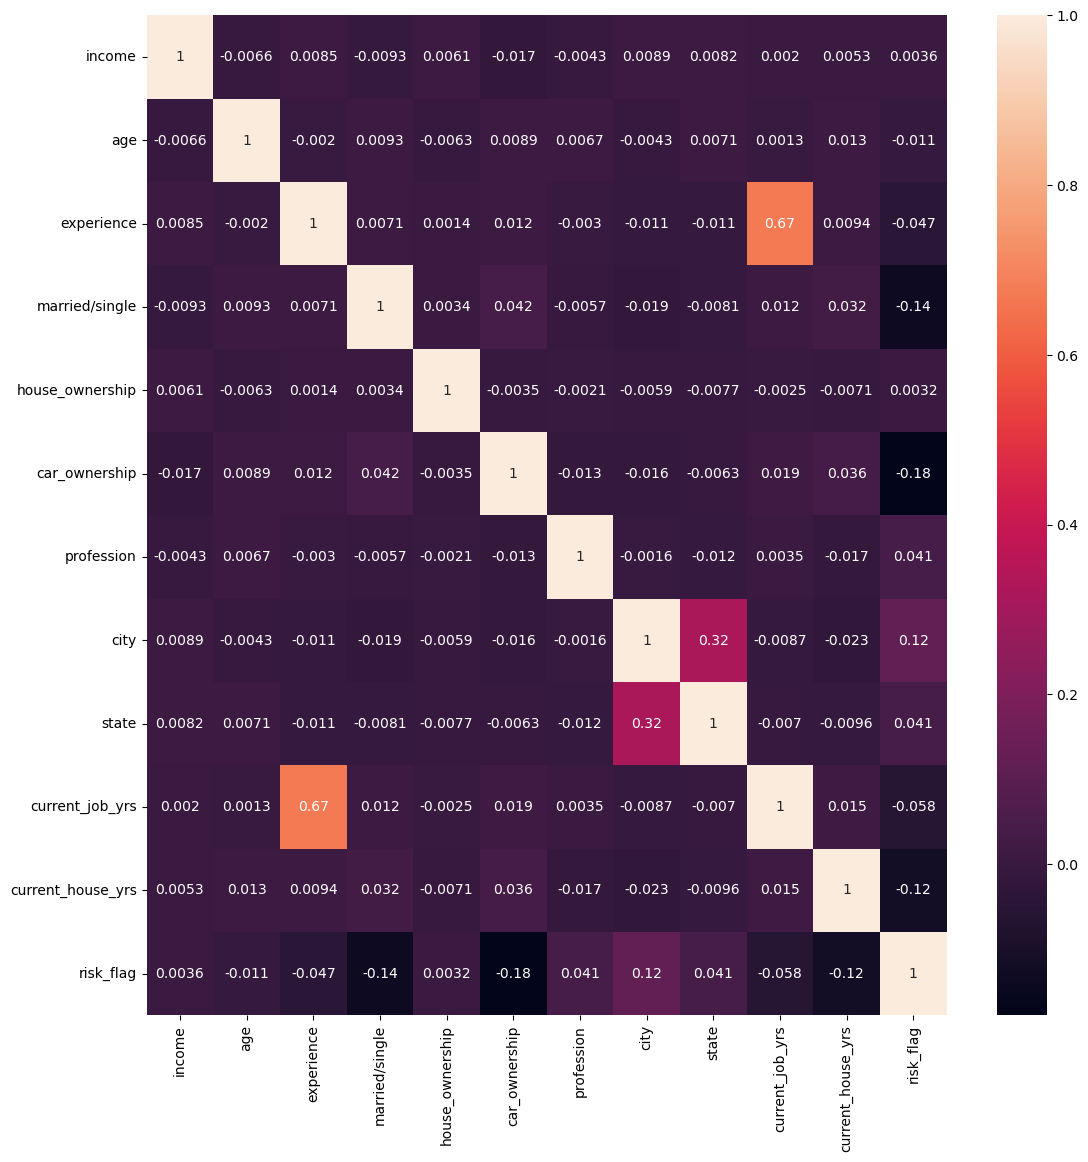

In [79]:
plot_correlation_heatmap(data_train_smote)

### feature importance for smote ENN

In [80]:
feature_selection_chi2(X_train_smoteenn, y_train_smoteenn, k=11)

feature_name  feature_score
5       car_ownership     328.929599
3      married/single     215.183741
10  current_house_yrs      50.049466
7                city      14.758224
6          profession       4.484210
9     current_job_yrs       4.356176
2          experience       3.812525
8               state       0.313561
0              income       0.058924
4     house_ownership       0.037558
1                 age       0.008543

In [81]:
feature_selection_f_classif(X_train_smoteenn, y_train_smoteenn, k=11)

Feature       Score
5       car_ownership  434.280287
3      married/single  233.473956
7                city  213.942601
10  current_house_yrs  208.806903
6          profession   46.132464
9     current_job_yrs   31.425977
2          experience   22.997570
8               state   11.878865
4     house_ownership    1.054503
0              income    0.348444
1                 age    0.056092

In [82]:
feature_selection_mutual_info_classif(X_train_smoteenn, y_train_smoteenn, k=11)

Feature     Score
0              income  0.512200
6          profession  0.371254
8               state  0.352741
7                city  0.338378
4     house_ownership  0.047613
10  current_house_yrs  0.022122
2          experience  0.016706
5       car_ownership  0.012008
3      married/single  0.009980
1                 age  0.008143
9     current_job_yrs  0.004761

In [83]:
get_most_important_features_pca(data_train_smoteenn, n_components=11)

Most_Important_Features
0                   income
1                      age
2               experience
3          current_job_yrs
4        current_house_yrs
5            car_ownership
6          house_ownership
7           married/single
8                     city
9               profession
10                   state

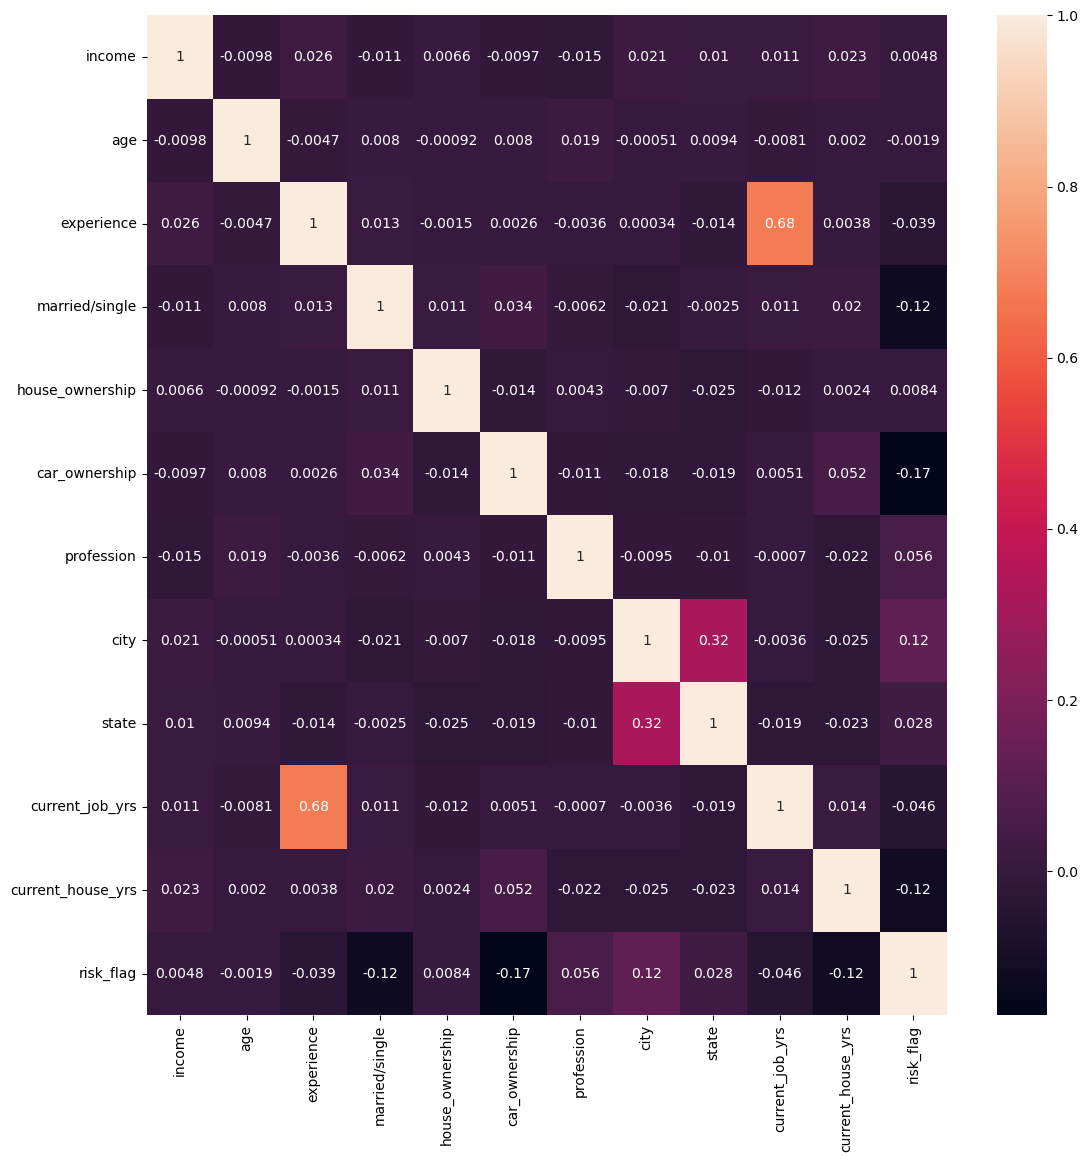

In [84]:
plot_correlation_heatmap(data_train_smoteenn)

### feature importance for under sampling

In [85]:
feature_selection_chi2(X_train_undersampled, y_train_undersampled, k=11)

feature_name  feature_score
7                city      10.982895
5       car_ownership       6.680881
6          profession       1.495584
8               state       0.505139
2          experience       0.131651
1                 age       0.115963
9     current_job_yrs       0.069419
3      married/single       0.041922
10  current_house_yrs       0.002110
4     house_ownership       0.001242
0              income       0.000772

In [86]:
feature_selection_f_classif(X_train_undersampled, y_train_undersampled, k=11)

Feature       Score
7                city  135.943768
8               state   17.385035
6          profession   13.762157
5       car_ownership    9.532905
2          experience    0.714009
1                 age    0.668014
9     current_job_yrs    0.452278
3      married/single    0.046697
4     house_ownership    0.030807
10  current_house_yrs    0.008422
0              income    0.004589

In [87]:
feature_selection_mutual_info_classif(X_train_undersampled, y_train_undersampled, k=11)

Feature     Score
6          profession  0.007045
10  current_house_yrs  0.003567
7                city  0.003261
5       car_ownership  0.002810
2          experience  0.002625
8               state  0.002084
1                 age  0.000812
0              income  0.000000
3      married/single  0.000000
4     house_ownership  0.000000
9     current_job_yrs  0.000000

In [88]:
get_most_important_features_pca(data_train_undersampled, n_components=11)

Most_Important_Features
0                   income
1                      age
2               experience
3          current_job_yrs
4        current_house_yrs
5            car_ownership
6           married/single
7          house_ownership
8                     city
9               profession
10                   state

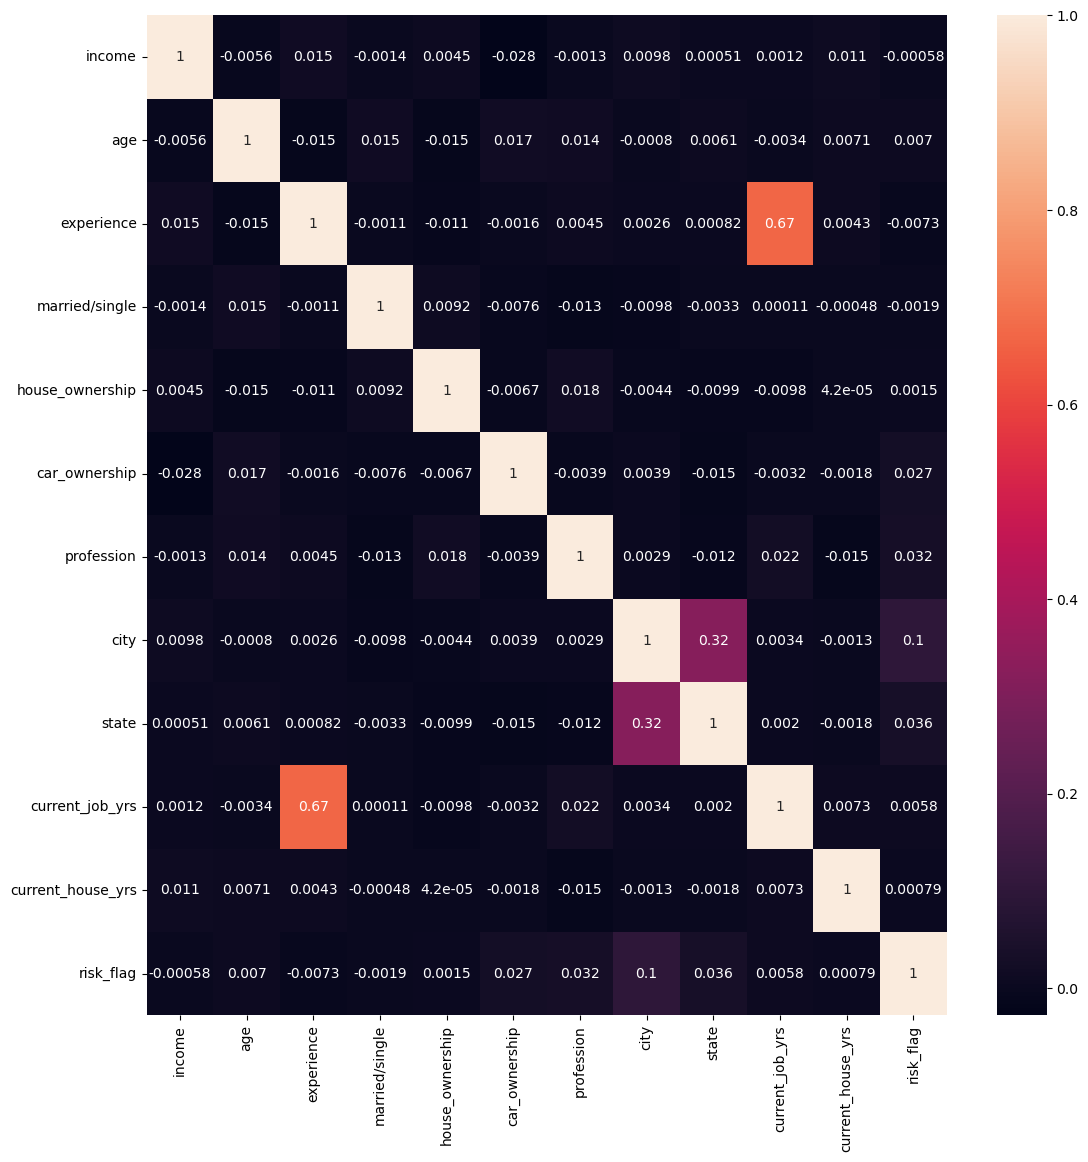

In [89]:
plot_correlation_heatmap(data_train_undersampled)

### feature importance for over&under sampling

In [90]:
feature_selection_chi2(X_train_over_undersampled, y_train_over_undersampled, k=11)

feature_name  feature_score
7                city      24.291606
6          profession       3.676508
5       car_ownership       3.588706
8               state       1.362571
2          experience       0.374968
1                 age       0.188530
9     current_job_yrs       0.064962
0              income       0.031846
3      married/single       0.019704
4     house_ownership       0.011166
10  current_house_yrs       0.001027

In [91]:
feature_selection_f_classif(X_train_over_undersampled, y_train_over_undersampled, k=11)

Feature       Score
7                city  301.187044
8               state   45.589202
6          profession   33.739486
5       car_ownership    5.126205
2          experience    2.040510
1                 age    1.086439
9     current_job_yrs    0.422190
4     house_ownership    0.275821
0              income    0.191353
3      married/single    0.021962
10  current_house_yrs    0.004111

In [92]:
feature_selection_mutual_info_classif(X_train_over_undersampled, y_train_over_undersampled, k=11)

Feature     Score
0              income  0.098892
8               state  0.005084
3      married/single  0.004984
4     house_ownership  0.004873
7                city  0.004865
2          experience  0.002028
5       car_ownership  0.001410
9     current_job_yrs  0.000127
1                 age  0.000000
6          profession  0.000000
10  current_house_yrs  0.000000

In [93]:
get_most_important_features_pca(data_train_over_undersampled, n_components=11)

Most_Important_Features
0                   income
1                      age
2               experience
3          current_job_yrs
4        current_house_yrs
5            car_ownership
6           married/single
7          house_ownership
8                     city
9               profession
10                   state

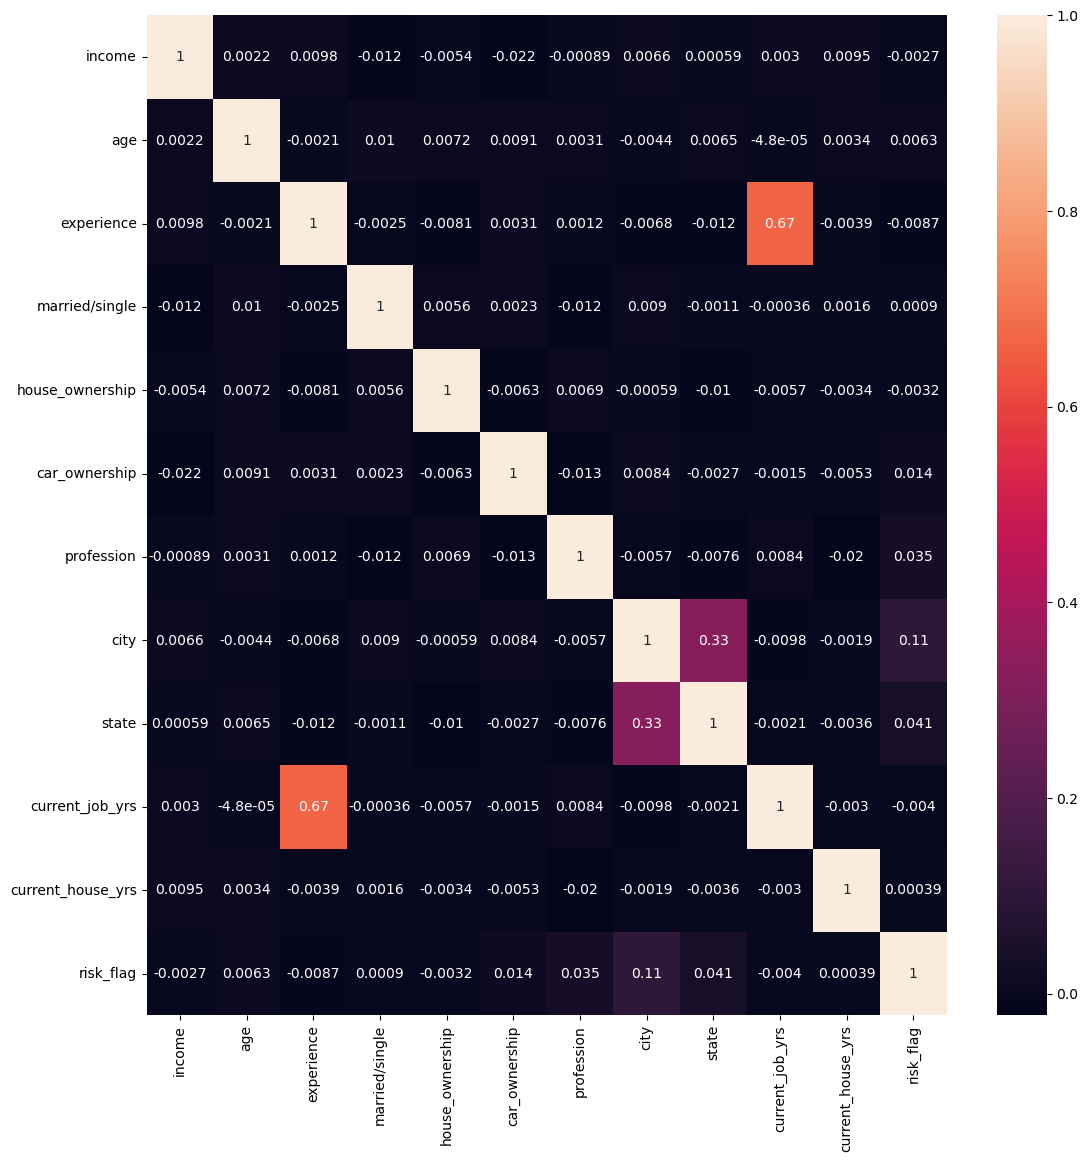

In [94]:
plot_correlation_heatmap(data_train_over_undersampled)

# Model development

## Decision Tree

### unbalanced data

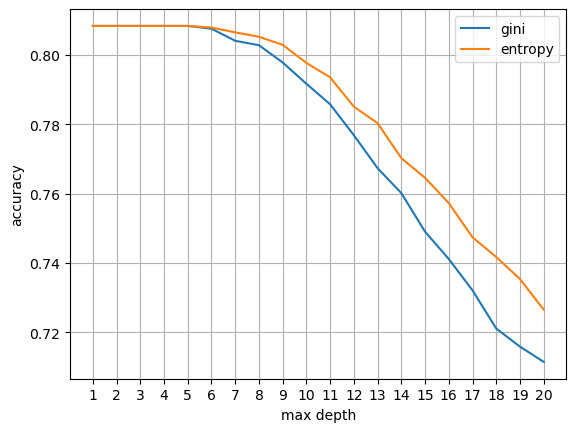

In [95]:
# X_train_unbalanced, X_val_unbalanced, y_train_unbalanced, y_val_unbalanced
evaluate_decision_tree(X_train_unbalanced, y_train_unbalanced, X_val_unbalanced, y_val_unbalanced)

### smote

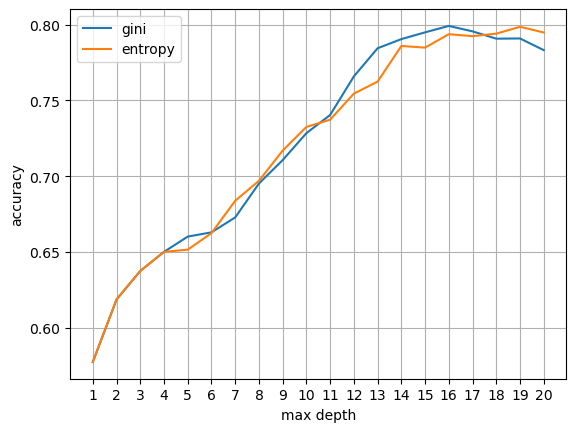

In [96]:
# X_train_smote, X_val_smote, y_train_smote, y_val_smote
evaluate_decision_tree(X_train_smote, y_train_smote, X_val_smote, y_val_smote)

### smote ENN

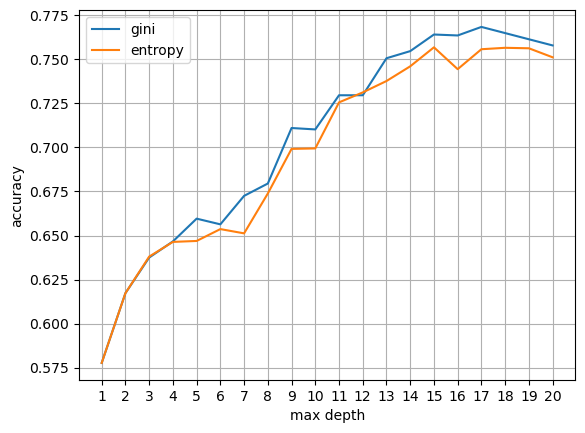

In [97]:
# X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
evaluate_decision_tree(X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn)

### undersampled

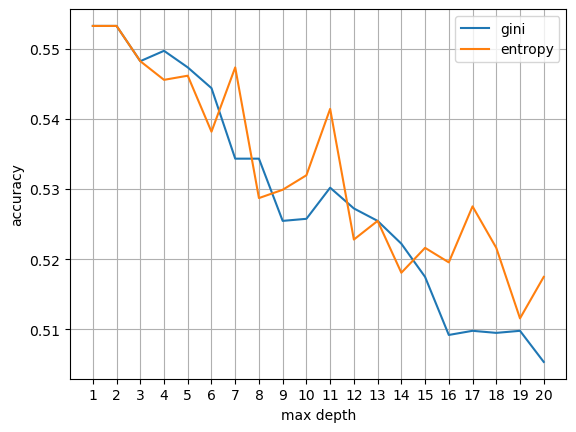

In [98]:
# X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled
evaluate_decision_tree(X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled)

### over/under sampled

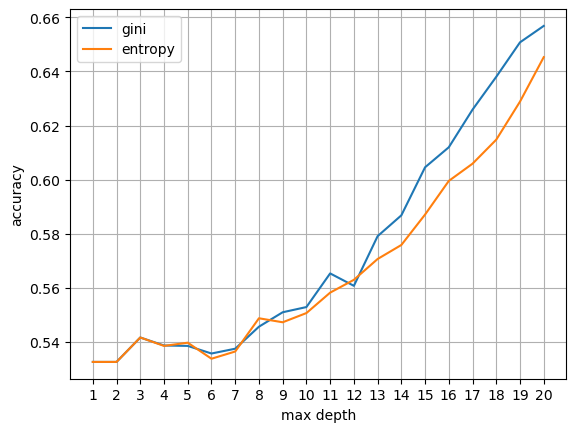

In [99]:
# X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
evaluate_decision_tree(X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled)

#### smote method has been selected for decision tree

              precision    recall  f1-score   support

without risk       0.74      0.86      0.79      6837
   with risk       0.84      0.70      0.76      7062

    accuracy                           0.78     13899
   macro avg       0.79      0.78      0.78     13899
weighted avg       0.79      0.78      0.78     13899



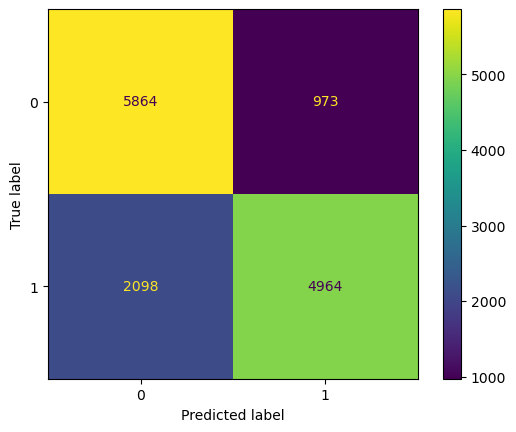

{'Model accuracy score:': 0.779048852435427,
 'train accuracy score:': 0.8626135443834877,
 'Confusion Matrix:': array([[5864,  973],
        [2098, 4964]], dtype=int64),
 'Precision:': 0.8361125147380832,
 'Recall': 0.7029170206740301,
 'best_estimator': 0.763751057773675,
 'cross-validation': 0.791852568197277}

In [78]:
classifier,results = train_evaluate_decision_tree(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote, criterion='gini', max_depth=16)
results

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.128705 to fit



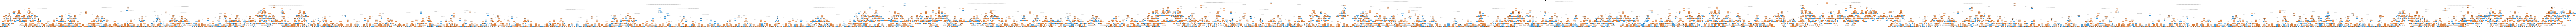

In [77]:
visualize_decision_tree(classifier, feature_names=X_train_smote.columns, class_names=['without risk', 'with risk'])

## Random Forest

### unbalanced data

              precision    recall  f1-score   support

without risk       0.81      0.99      0.89      6982
   with risk       0.02      0.00      0.00      1656

    accuracy                           0.80      8638
   macro avg       0.41      0.50      0.45      8638
weighted avg       0.66      0.80      0.72      8638



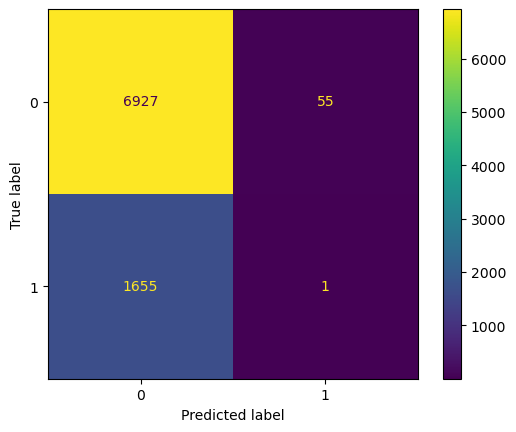

(RandomForestClassifier(max_depth=16),
 {'Model accuracy score:': 0.8020375086825654,
  'train accuracy score:': 0.8540171335957397,
  'Confusion Matrix:': array([[6927,   55],
         [1655,    1]], dtype=int64),
  'Precision:': 0.017857142857142856,
  'Recall': 0.0006038647342995169,
  'best_estimator': 0.0011682242990654205,
  'cross-validation': 0.7991433202130123})

In [101]:
# X, y     X_train_unbalanced, X_val_unbalanced, y_train_unbalanced, y_val_unbalanced
evaluate_randomforest(X, y, X_train_unbalanced, y_train_unbalanced, X_val_unbalanced, y_val_unbalanced, n_estimators = 100,criterion = 'gini', max_depth = 16)

### smote

              precision    recall  f1-score   support

without risk       0.75      0.81      0.78      6837
   with risk       0.80      0.74      0.77      7062

    accuracy                           0.78     13899
   macro avg       0.78      0.78      0.78     13899
weighted avg       0.78      0.78      0.78     13899



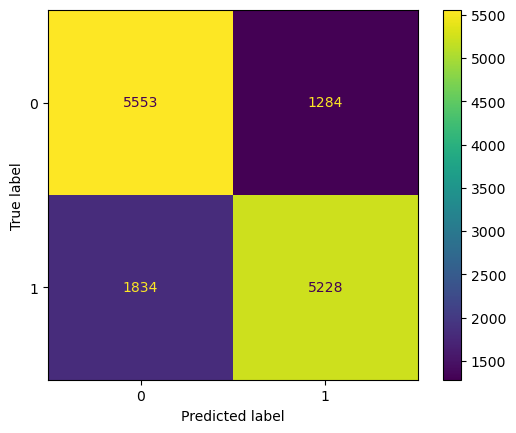

(RandomForestClassifier(max_depth=16),
 {'Model accuracy score:': 0.7756673141952658,
  'train accuracy score:': 0.8574512096411547,
  'Confusion Matrix:': array([[5553, 1284],
         [1834, 5228]], dtype=int64),
  'Precision:': 0.8028255528255528,
  'Recall': 0.7403001982441235,
  'best_estimator': 0.7702961544128482,
  'cross-validation': 0.7816215759008852})

In [102]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
evaluate_randomforest(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote, n_estimators = 100,criterion = 'gini', max_depth = 16)

### smote ENN

              precision    recall  f1-score   support

without risk       0.76      0.80      0.78      1841
   with risk       0.79      0.76      0.77      1872

    accuracy                           0.78      3713
   macro avg       0.78      0.78      0.78      3713
weighted avg       0.78      0.78      0.78      3713



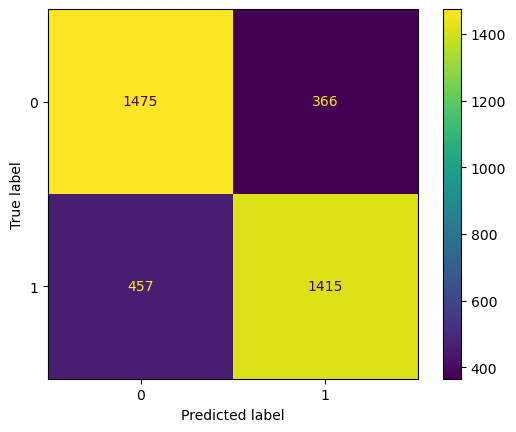

(RandomForestClassifier(max_depth=16),
 {'Model accuracy score:': 0.7783463506598438,
  'train accuracy score:': 0.9323905723905724,
  'Confusion Matrix:': array([[1475,  366],
         [ 457, 1415]], dtype=int64),
  'Precision:': 0.7944974733295901,
  'Recall': 0.7558760683760684,
  'best_estimator': 0.7747057213249383,
  'cross-validation': 0.7873196769446456})

In [103]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn    
evaluate_randomforest(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn, n_estimators = 100,criterion = 'gini', max_depth = 16)

### undersampled

              precision    recall  f1-score   support

without risk       0.52      0.53      0.53      1692
   with risk       0.52      0.51      0.51      1686

    accuracy                           0.52      3378
   macro avg       0.52      0.52      0.52      3378
weighted avg       0.52      0.52      0.52      3378



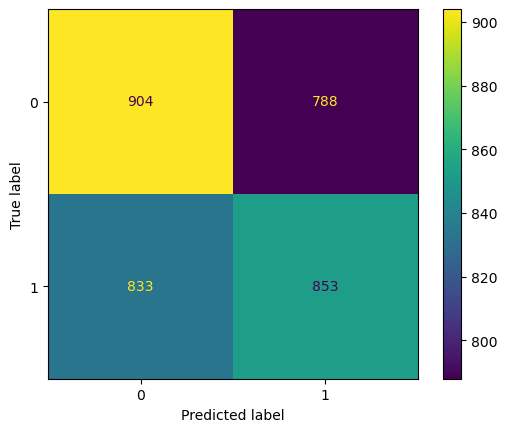

(RandomForestClassifier(max_depth=16),
 {'Model accuracy score:': 0.5201302545885139,
  'train accuracy score:': 0.9832691738229198,
  'Confusion Matrix:': array([[904, 788],
         [833, 853]], dtype=int64),
  'Precision:': 0.5198049969530774,
  'Recall': 0.5059311981020166,
  'best_estimator': 0.5127742711151186,
  'cross-validation': 0.5131436967385844})

In [104]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled     
evaluate_randomforest(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled, n_estimators = 100,criterion = 'gini', max_depth = 16)

### over/under sampled

              precision    recall  f1-score   support

without risk       0.77      0.71      0.74      3395
   with risk       0.73      0.78      0.75      3360

    accuracy                           0.75      6755
   macro avg       0.75      0.75      0.75      6755
weighted avg       0.75      0.75      0.75      6755



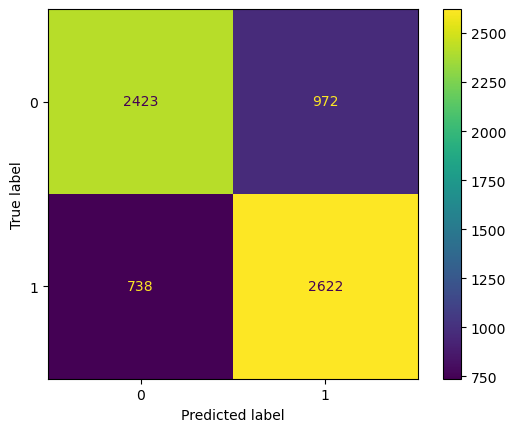

(RandomForestClassifier(max_depth=16),
 {'Model accuracy score:': 0.7468541820873427,
  'train accuracy score:': 0.9756079505496539,
  'Confusion Matrix:': array([[2423,  972],
         [ 738, 2622]], dtype=int64),
  'Precision:': 0.7295492487479132,
  'Recall': 0.7803571428571429,
  'best_estimator': 0.7540983606557378,
  'cross-validation': 0.7652786507410122})

In [105]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
evaluate_randomforest(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled, n_estimators = 100,criterion = 'gini', max_depth = 16)

## Feature Scaling

In [106]:
scaler_cols=x_smote.iloc[:, [0, 1, 2, 4, 6, 7, 8, 9, 10]].columns,
binary_features=x_smote.iloc[:, [3, 5]].columns

In [107]:
## standard scaler balanced data with smote
sX_val , sX_train = standardscale_features(
    X_train_smote,
    X_val_smote,
    scaler_cols=x_smote.iloc[:, [0, 1, 2, 4, 6, 7, 8, 9, 10]].columns,
    binary_features=x_smote.iloc[:, [3, 5]].columns
)


In [108]:
sX_val

income       age  experience  house_ownership  profession      city  \
0     -0.293904 -0.299735   -0.665595        -0.084982    1.639526 -0.648959   
1      1.444317 -1.618803   -0.489187        -0.084982   -0.225217 -0.058215   
2      1.506710 -1.053488    1.274897        -0.084982    0.388538 -0.673627   
3      0.326541  1.773086   -1.371229        -0.084982   -1.225814  0.754035   
4     -0.638616 -0.739425    0.216447        -0.084982    1.544753 -0.155451   
...         ...       ...         ...              ...         ...       ...   
55590  0.551359  0.516831    1.627714        -0.084982    0.472604  0.475704   
55591 -1.337022 -1.430365   -0.136370        -0.084982   -2.210596  0.879645   
55592 -0.691200 -0.550986   -1.371229         2.522642   -1.714641  0.288084   
55593 -0.171960  0.139954   -0.665595        -0.084982   -1.858427  0.730957   
55594  1.272842 -1.430365   -1.724046        -0.084982   -0.054787 -1.251131   

          state  current_job_yrs  current_house_yrs  married/single  \
0      0.345091        -0.034141          -1.381993               1   
1      1.352649        -0.324858           0.112486               0   
2     -1.350126        -0.034141           0.859725               0   
3      0.345091        -1.197007           1.606965               0   
4      0.365925         1.128724          -1.381993               0   
...         ...              ...                ...             ...   
55590 -0.233706         0.547291          -1.381993               0   
55591  1.004601        -0.324858           1.606965               0   
55592 -0.556830        -1.197007           1.606965               0   
55593  0.760352        -0.034141           1.606965               0   
55594 -0.233706        -1.778440           0.859725               0   

       car_ownership  
0                  0  
1                  0  
2                  0  
3                  1  
4                  1  
...              ...  
55590              1  
55591              0  
55592              0  
55593              0  
55594              0  

[55595 rows x 11 columns]

In [109]:
sX_train

income       age  experience  house_ownership  profession      city  \
0      0.346408 -0.111297    0.216447        -0.084982   -0.879144 -0.106289   
1      1.241176  0.516831    0.040038        -0.084982    0.701420  0.758456   
2     -0.409615 -0.174110   -1.194821        -0.084982   -0.389909  0.636166   
3     -0.807780 -1.053488   -0.312779        -0.084982    0.096231  0.710555   
4      0.710747 -1.681616    0.922080        -0.084982   -0.054386  0.643949   
...         ...       ...         ...              ...         ...       ...   
13894 -0.742051 -0.048484   -1.547637        -0.084982    1.639526  0.850991   
13895 -1.172831 -0.236923    0.040038        -0.084982    1.573103 -0.308383   
13896  0.616374  0.893707    1.274897        -0.084982    0.320541 -0.816058   
13897 -1.301226  0.830894    1.627714        -0.084982    0.533548  0.669843   
13898 -0.457340  0.328392    0.745672        -0.084982   -0.550756 -1.358024   

          state  current_job_yrs  current_house_yrs  married/single  \
0     -1.018616        -0.615574           0.112486               0   
1      0.293691         0.547291          -0.634754               0   
2     -0.598645        -1.487723          -1.381993               0   
3     -0.373413         0.547291          -0.634754               0   
4      0.992484        -0.615574          -1.381993               0   
...         ...              ...                ...             ...   
13894 -0.224569        -1.487723           1.606965               0   
13895 -0.233706        -0.906291           1.606965               0   
13896 -0.696352         1.128724          -0.634754               0   
13897  0.985088         1.419441           0.112486               0   
13898 -0.517675         1.419441          -1.381993               0   

       car_ownership  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
13894              0  
13895              0  
13896              0  
13897              0  
13898              0  

[13899 rows x 11 columns]

## SVM

In [80]:
scaler_cols=X_train_smote.iloc[:, [0, 1, 2, 4, 6, 7, 8, 9, 10]].columns
binary_features=X_train_smote.iloc[:, [3, 5]].columns

### smote

In [75]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
##train_evaluate_svm(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote,scaler_cols,binary_features, C=10, gamma=0.2, kernel='rbf')

### smote ENN

In [76]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
##train_evaluate_svm(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn,scaler_cols,binary_features, C=10, gamma=0.2, kernel='rbf')

### undersampled

In [77]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled   
##train_evaluate_svm(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled,scaler_cols,binary_features, C=10, gamma=0.2, kernel='rbf')

### over/under sampled


In [78]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
##train_evaluate_svm(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled,scaler_cols,binary_features, C=10, gamma=0.2, kernel='rbf')

## KNN

In [79]:
scaler_cols=X_train_smote.iloc[:, [0, 1, 2, 4, 6, 7, 8, 9, 10]].columns
binary_features=X_train_smote.iloc[:, [3, 5]].columns

### smote

In [71]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_predict_evaluate_knn(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote,scaler_cols=scaler_cols, binary_features=binary_features,n_neighbors=7)

              precision    recall  f1-score   support

without risk       0.71      0.59      0.65      6837
   with risk       0.66      0.77      0.71      7062

    accuracy                           0.68     13899
   macro avg       0.69      0.68      0.68     13899
weighted avg       0.69      0.68      0.68     13899



{'Model accuracy score:': 0.6817756673141953,
 'train accuracy score:': 0.7718140120514435,
 'Confusion Matrix:': array([[4022, 2815],
        [1608, 5454]], dtype=int64),
 'Precision:': 0.6595718950296288,
 'Recall': 0.7723024638912489,
 'best_estimator': 0.7114995760224382,
 'cross-validation': 0.619262275716914}

### smote ENN

In [72]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_predict_evaluate_knn(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn,scaler_cols, binary_features,n_neighbors=7)

              precision    recall  f1-score   support

without risk       0.71      0.53      0.61      1861
   with risk       0.62      0.78      0.69      1828

    accuracy                           0.65      3689
   macro avg       0.66      0.65      0.65      3689
weighted avg       0.66      0.65      0.65      3689



{'Model accuracy score:': 0.6535646516671184,
 'train accuracy score:': 0.7567787418655098,
 'Confusion Matrix:': array([[ 994,  867],
        [ 411, 1417]], dtype=int64),
 'Precision:': 0.6204028021015762,
 'Recall': 0.7751641137855579,
 'best_estimator': 0.6892023346303501,
 'cross-validation': 0.849031650294811}

### undersampled

In [73]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled   
train_predict_evaluate_knn(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled,scaler_cols, binary_features,n_neighbors=7)

              precision    recall  f1-score   support

without risk       0.51      0.50      0.50      1692
   with risk       0.51      0.52      0.51      1686

    accuracy                           0.51      3378
   macro avg       0.51      0.51      0.51      3378
weighted avg       0.51      0.51      0.51      3378



{'Model accuracy score:': 0.5071047957371225,
 'train accuracy score:': 0.6619040568551969,
 'Confusion Matrix:': array([[844, 848],
        [817, 869]], dtype=int64),
 'Precision:': 0.5061153174140943,
 'Recall': 0.5154211150652431,
 'best_estimator': 0.5107258301498677,
 'cross-validation': 0.49378176042920596}

### over/under sampled

In [74]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
train_predict_evaluate_knn(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled,scaler_cols, binary_features,n_neighbors=7)

              precision    recall  f1-score   support

without risk       0.58      0.52      0.55      3395
   with risk       0.56      0.62      0.59      3360

    accuracy                           0.57      6755
   macro avg       0.57      0.57      0.57      6755
weighted avg       0.57      0.57      0.57      6755



{'Model accuracy score:': 0.5695040710584752,
 'train accuracy score:': 0.6997446052485472,
 'Confusion Matrix:': array([[1780, 1615],
        [1293, 2067]], dtype=int64),
 'Precision:': 0.5613796849538294,
 'Recall': 0.6151785714285715,
 'best_estimator': 0.5870491337688156,
 'cross-validation': 0.571953492726631}

## LogisticRegression

### logistic regression

#### smote

In [81]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_evaluate_logistic_regression(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote)

              precision    recall  f1-score   support

without risk       0.49      1.00      0.66      6837
   with risk       0.00      0.00      0.00      7062

    accuracy                           0.49     13899
   macro avg       0.25      0.50      0.33     13899
weighted avg       0.24      0.49      0.32     13899



{'Accuracy:': 0.4919058925102525,
 'train accuracy score:': 0.5020235632700782,
 'F1 Score:': 0.0,
 'Precision:': 0.0,
 'Recall': 0.0,
 'best_estimator': 0.0,
 'Cross-Validation Scores': 0.13449747440499177}

#### smote ENN

In [82]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_evaluate_logistic_regression(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn)

              precision    recall  f1-score   support

without risk       0.00      0.00      0.00      1861
   with risk       0.50      1.00      0.66      1828

    accuracy                           0.50      3689
   macro avg       0.25      0.50      0.33      3689
weighted avg       0.25      0.50      0.33      3689



{'Accuracy:': 0.49552724315532665,
 'train accuracy score:': 0.5008812364425163,
 'F1 Score:': 0.662678992205909,
 'Precision:': 0.49552724315532665,
 'Recall': 1.0,
 'best_estimator': 0.662678992205909,
 'Cross-Validation Scores': 0.00016268980477223427}

#### undersampled

In [83]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled   
train_evaluate_logistic_regression(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled)

              precision    recall  f1-score   support

without risk       0.00      0.00      0.00      1692
   with risk       0.50      1.00      0.67      1686

    accuracy                           0.50      3378
   macro avg       0.25      0.50      0.33      3378
weighted avg       0.25      0.50      0.33      3378



{'Accuracy:': 0.4991119005328597,
 'train accuracy score:': 0.5002220906129701,
 'F1 Score:': 0.6658767772511849,
 'Precision:': 0.4991119005328597,
 'Recall': 1.0,
 'best_estimator': 0.6658767772511849,
 'Cross-Validation Scores': 0.00011841326228537595}

#### over/under sampled

In [84]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
train_evaluate_logistic_regression(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled)

              precision    recall  f1-score   support

without risk       0.50      1.00      0.67      3395
   with risk       0.00      0.00      0.00      3360

    accuracy                           0.50      6755
   macro avg       0.25      0.50      0.33      6755
weighted avg       0.25      0.50      0.34      6755



{'Accuracy:': 0.5025906735751295,
 'train accuracy score:': 0.4993522596883444,
 'F1 Score:': 0.0,
 'Precision:': 0.0,
 'Recall': 0.0,
 'best_estimator': 0.0,
 'Cross-Validation Scores': 2.961208172934557e-05}

### logistic regression elastic net

#### smote

In [ ]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
##train_evaluate_logistic_regression_elastic_net(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote)

#### smote ENN

In [ ]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
##train_evaluate_logistic_regression_elastic_net(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn)

#### undersampled

In [ ]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled   
##train_evaluate_logistic_regression_elastic_net(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled)

#### over/under sampled

In [ ]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
##train_evaluate_logistic_regression_elastic_net(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled)

## naive bayes Gaussian

### smote

In [81]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_evaluate_naive_bayes_Gaussian(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Test Set Metrics:
Accuracy: 0.49636664508238004
F1 Score: 0.4087837837837838
Precision: 0.5064880703223106
Recall: 0.3426791277258567

Cross-Validation Scores: [0.50363335 0.49874092 0.51320239 0.50154687 0.50402936]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.49      0.66      0.56      6837
   with risk       0.51      0.34      0.41      7062

    accuracy                           0.50     13899
   macro avg       0.50      0.50      0.49     13899
weighted avg       0.50      0.50      0.48     13899



### smote ENN

In [82]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_evaluate_naive_bayes_Gaussian(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Test Set Metrics:
Accuracy: 0.512848551120831
F1 Score: 0.6109170305676855
Precision: 0.5139603232916973
Recall: 0.7529601722282023

Cross-Validation Scores: [0.50464735 0.50451189 0.50451189 0.50451189 0.51025431]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.51      0.27      0.35      1800
   with risk       0.51      0.75      0.61      1858

    accuracy                           0.51      3658
   macro avg       0.51      0.51      0.48      3658
weighted avg       0.51      0.51      0.48      3658



### undersampled

In [83]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled   
train_evaluate_naive_bayes_Gaussian(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Test Set Metrics:
Accuracy: 0.48164594434576674
F1 Score: 0.5532023475376372
Precision: 0.48544558889386474
Recall: 0.6429418742586003

Cross-Validation Scores: [0.4946714  0.50932781 0.50458987 0.48859935 0.50044418]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.47      0.32      0.38      1692
   with risk       0.49      0.64      0.55      1686

    accuracy                           0.48      3378
   macro avg       0.48      0.48      0.47      3378
weighted avg       0.48      0.48      0.47      3378



### over/under sampled

In [85]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
train_evaluate_naive_bayes_Gaussian(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled,y_val_over_undersampled) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Test Set Metrics:
Accuracy: 0.49785344189489267
F1 Score: 0.4818209593644974
Precision: 0.49497802887633396
Recall: 0.4693452380952381

Cross-Validation Scores: [0.5022946  0.49711325 0.5        0.49718685 0.49792715]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.50      0.53      0.51      3395
   with risk       0.49      0.47      0.48      3360

    accuracy                           0.50      6755
   macro avg       0.50      0.50      0.50      6755
weighted avg       0.50      0.50      0.50      6755



## naive bayes Multinomial

### smote

In [89]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_evaluate_naive_bayes_Multinomial(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Validation Set Metrics:
Accuracy: 0.6017699115044248
F1 Score: 0.6787766235273635
Precision: 0.5750811289212312
Recall: 0.8280940243557066

Cross-Validation Scores: [0.50154687 0.54744946 0.53780848 0.55745018 0.56303065]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.67      0.37      0.48      6837
   with risk       0.58      0.83      0.68      7062

    accuracy                           0.60     13899
   macro avg       0.62      0.60      0.58     13899
weighted avg       0.62      0.60      0.58     13899



### smote ENN

In [90]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_evaluate_naive_bayes_Multinomial(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Validation Set Metrics:
Accuracy: 0.5959540732640787
F1 Score: 0.6764448336252189
Precision: 0.5701107011070111
Recall: 0.8315392895586652

Cross-Validation Scores: [0.48797157 0.53513809 0.56767842 0.5635767  0.55455291]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.67      0.35      0.46      1800
   with risk       0.57      0.83      0.68      1858

    accuracy                           0.60      3658
   macro avg       0.62      0.59      0.57      3658
weighted avg       0.62      0.60      0.57      3658



### undersampled

In [91]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled   
train_evaluate_naive_bayes_Multinomial(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Validation Set Metrics:
Accuracy: 0.5082889283599763
F1 Score: 0.47486563389187475
Precision: 0.5084631008801624
Recall: 0.4454329774614472

Cross-Validation Scores: [0.49940793 0.5078472  0.50932781 0.49007995 0.49511401]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.51      0.57      0.54      1692
   with risk       0.51      0.45      0.47      1686

    accuracy                           0.51      3378
   macro avg       0.51      0.51      0.51      3378
weighted avg       0.51      0.51      0.51      3378



### over/under sampled

In [93]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
train_evaluate_naive_bayes_Multinomial(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Validation Set Metrics:
Accuracy: 0.5311621021465581
F1 Score: 0.5438571222814346
Precision: 0.5269327379291097
Recall: 0.5619047619047619

Cross-Validation Scores: [0.50451517 0.49311621 0.49333728 0.49644655 0.50177672]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.54      0.50      0.52      3395
   with risk       0.53      0.56      0.54      3360

    accuracy                           0.53      6755
   macro avg       0.53      0.53      0.53      6755
weighted avg       0.53      0.53      0.53      6755



## naive bayes Bernoulli

### smote

In [95]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_evaluate_naive_bayes_Bernoulli(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Set Metrics:
Accuracy: 0.618245916972444
F1 Score: 0.6779167172514264
Precision: 0.5932851678708032
Recall: 0.7907108467856131

Cross-Validation Scores: [0.49794949 0.60817325 0.64529822 0.64932729 0.64289826]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.67      0.44      0.53      6837
   with risk       0.59      0.79      0.68      7062

    accuracy                           0.62     13899
   macro avg       0.63      0.62      0.60     13899
weighted avg       0.63      0.62      0.61     13899



### smote ENN

In [96]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_evaluate_naive_bayes_Bernoulli(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Set Metrics:
Accuracy: 0.6191908146528158
F1 Score: 0.680137772675086
Precision: 0.5931117340808971
Recall: 0.7970936490850377

Cross-Validation Scores: [0.48195735 0.61088324 0.6395953  0.65791632 0.65108012]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.68      0.44      0.53      1800
   with risk       0.59      0.80      0.68      1858

    accuracy                           0.62      3658
   macro avg       0.63      0.62      0.60      3658
weighted avg       0.63      0.62      0.61      3658



### undersampled

In [97]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled   
train_evaluate_naive_bayes_Bernoulli(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Set Metrics:
Accuracy: 0.5455891059798698
F1 Score: 0.5281278819551183
Precision: 0.5481812380344607
Recall: 0.5094899169632265

Cross-Validation Scores: [0.50296033 0.51643471 0.51850755 0.49896358 0.49896358]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.54      0.58      0.56      1692
   with risk       0.55      0.51      0.53      1686

    accuracy                           0.55      3378
   macro avg       0.55      0.55      0.54      3378
weighted avg       0.55      0.55      0.54      3378



### over/under sampled

In [98]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
train_evaluate_naive_bayes_Bernoulli(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Set Metrics:
Accuracy: 0.5372316802368616
F1 Score: 0.5109511889862327
Precision: 0.5385883905013192
Recall: 0.48601190476190476

Cross-Validation Scores: [0.50969652 0.50673575 0.49837134 0.51021617 0.50384957]

Classification Report on Validation Set:
              precision    recall  f1-score   support

without risk       0.54      0.59      0.56      3395
   with risk       0.54      0.49      0.51      3360

    accuracy                           0.54      6755
   macro avg       0.54      0.54      0.54      6755
weighted avg       0.54      0.54      0.54      6755



## XGBoost

In [70]:
xgb_params = {
     'objective': 'binary:hinge',
     'max_depth': 15,
     'learning_rate': 0.01,
     'n_estimators': 400,
     'gamma': 0.1,
     'subsample': 0.9,
     'colsample_bytree': 0.6
 }

### unbalanced

              precision    recall  f1-score   support

without risk       0.80      0.98      0.88      6982
   with risk       0.01      0.00      0.00      1656

    accuracy                           0.79      8638
   macro avg       0.41      0.49      0.44      8638
weighted avg       0.65      0.79      0.71      8638



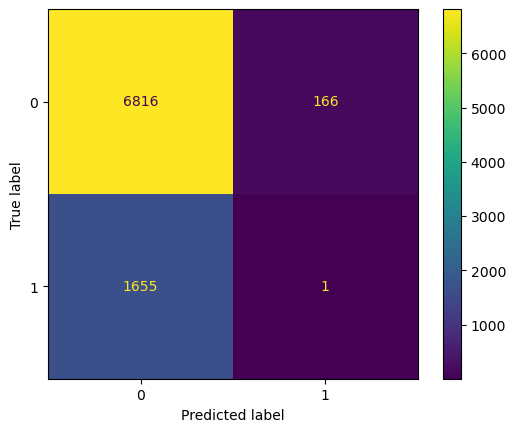

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=15, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:hinge', predictor=None, ...),
 {'Model accuracy score:': 0.7891873118777495,
  'train accuracy score:': 0.9293818013429035,
  'Confusion Matrix:': array([[6816,  166],
         [1655,    1]], dtype=int64),
  'Precision:': 0.005988023952095809,
  'Recall': 0.00060

In [71]:
# X, y     X_train_unbalanced, X_val_unbalanced, y_train_unbalanced, y_val_unbalanced
train_evaluate_xgboost(X, y, X_train_unbalanced, y_train_unbalanced, X_val_unbalanced, y_val_unbalanced, xgb_params)

### smote

              precision    recall  f1-score   support

without risk       0.79      0.99      0.88      6837
   with risk       0.98      0.74      0.85      7062

    accuracy                           0.86     13899
   macro avg       0.89      0.87      0.86     13899
weighted avg       0.89      0.86      0.86     13899



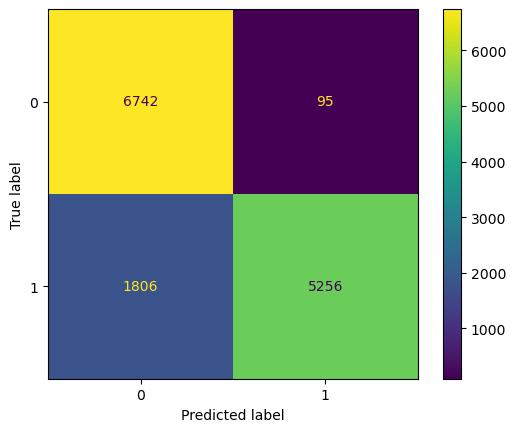

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=15, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:hinge', predictor=None, ...),
 {'Model accuracy score:': 0.8632275703288006,
  'train accuracy score:': 0.9255328716611206,
  'Confusion Matrix:': array([[6742,   95],
         [1806, 5256]], dtype=int64),
  'Precision:': 0.9822463091011026,
  'Recall': 0.7442650

In [72]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_evaluate_xgboost(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote, xgb_params)

### smote ENN

              precision    recall  f1-score   support

without risk       0.81      0.99      0.89      1842
   with risk       0.99      0.77      0.87      1877

    accuracy                           0.88      3719
   macro avg       0.90      0.88      0.88      3719
weighted avg       0.90      0.88      0.88      3719



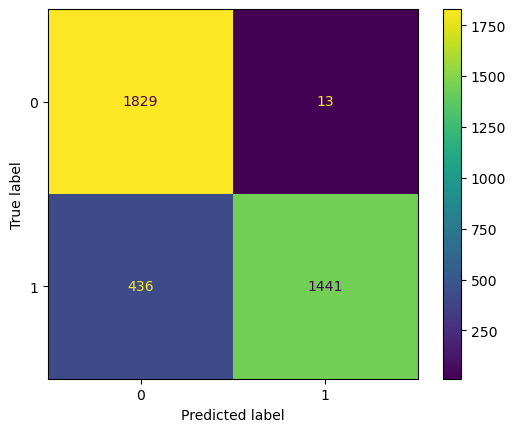

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=15, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:hinge', predictor=None, ...),
 {'Model accuracy score:': 0.8792686205969347,
  'train accuracy score:': 0.981711826800242,
  'Confusion Matrix:': array([[1829,   13],
         [ 436, 1441]], dtype=int64),
  'Precision:': 0.9910591471801926,
  'Recall': 0.76771443

In [73]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_evaluate_xgboost(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn, xgb_params)

### undersampled

              precision    recall  f1-score   support

without risk       0.49      0.34      0.40      1692
   with risk       0.50      0.65      0.56      1686

    accuracy                           0.49      3378
   macro avg       0.49      0.50      0.48      3378
weighted avg       0.49      0.49      0.48      3378



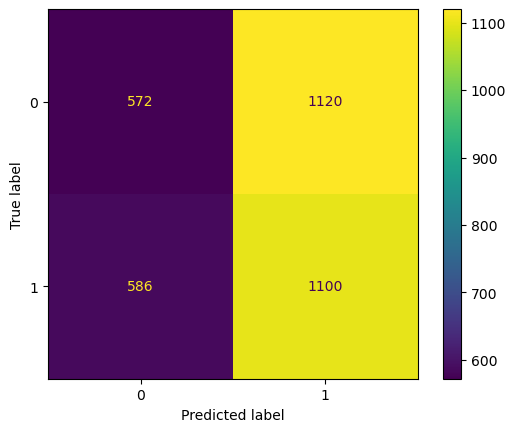

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=15, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:hinge', predictor=None, ...),
 {'Model accuracy score:': 0.49496743635287155,
  'train accuracy score:': 0.9755700325732899,
  'Confusion Matrix:': array([[ 572, 1120],
         [ 586, 1100]], dtype=int64),
  'Precision:': 0.4954954954954955,
  'Recall': 0.652431

In [74]:
# X_undersampled, y_undersampled     X_train_undersampled, X_val_undersampled, y_train_undersampled, y_val_undersampled   
train_evaluate_xgboost(X_undersampled, y_undersampled, X_train_undersampled, y_train_undersampled, X_val_undersampled, y_val_undersampled, xgb_params)

### over/under sampled

              precision    recall  f1-score   support

without risk       0.79      0.63      0.70      3395
   with risk       0.69      0.83      0.75      3360

    accuracy                           0.73      6755
   macro avg       0.74      0.73      0.73      6755
weighted avg       0.74      0.73      0.73      6755



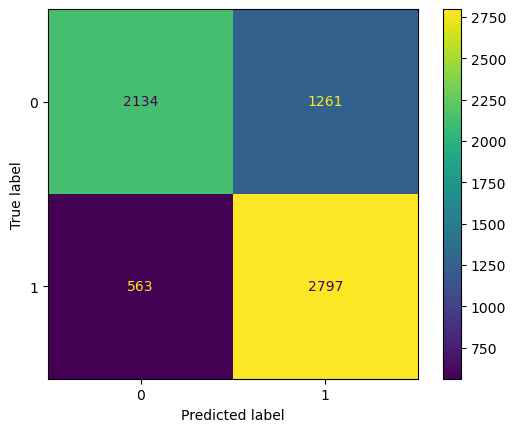

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=15, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:hinge', predictor=None, ...),
 {'Model accuracy score:': 0.7299777942264989,
  'train accuracy score:': 0.9734981678202613,
  'Confusion Matrix:': array([[2134, 1261],
         [ 563, 2797]], dtype=int64),
  'Precision:': 0.6892557910300641,
  'Recall': 0.8324404

In [75]:
# X_over_undersampled, y_over_undersampled   X_train_over_undersampled, X_val_over_undersampled, y_train_over_undersampled, y_val_over_undersampled
train_evaluate_xgboost(X_over_undersampled, y_over_undersampled, X_train_over_undersampled, y_train_over_undersampled, X_val_over_undersampled, y_val_over_undersampled, xgb_params)

### testing different xgb_params for the best sampling


In [76]:
xgb_params = {
     'objective': 'binary:hinge',
     'max_depth': 16,
     'learning_rate': 0.01,
     'n_estimators': 400,
     'gamma': 0.1,
     'subsample': 0.9,
     'colsample_bytree': 0.7
 }

### smote

              precision    recall  f1-score   support

without risk       0.79      0.98      0.87      6837
   with risk       0.97      0.75      0.84      7062

    accuracy                           0.86     13899
   macro avg       0.88      0.86      0.86     13899
weighted avg       0.88      0.86      0.86     13899



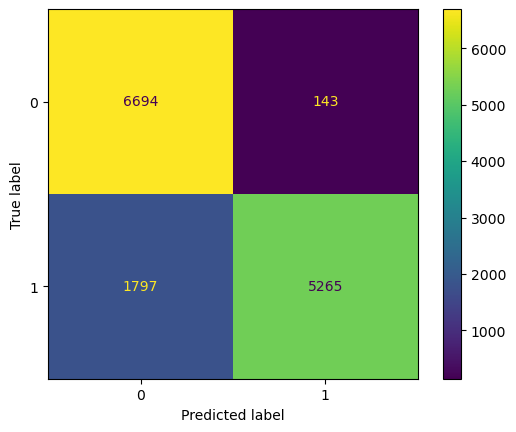

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=16, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:hinge', predictor=None, ...),
 {'Model accuracy score:': 0.8604216130656882,
  'train accuracy score:': 0.9487723716161526,
  'Confusion Matrix:': array([[6694,  143],
         [1797, 5265]], dtype=int64),
  'Precision:': 0.9735576923076923,
  'Recall': 0.7455395

In [77]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_evaluate_xgboost(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote, xgb_params)

### smote ENN

              precision    recall  f1-score   support

without risk       0.81      0.98      0.89      1842
   with risk       0.98      0.77      0.87      1877

    accuracy                           0.88      3719
   macro avg       0.90      0.88      0.88      3719
weighted avg       0.90      0.88      0.88      3719



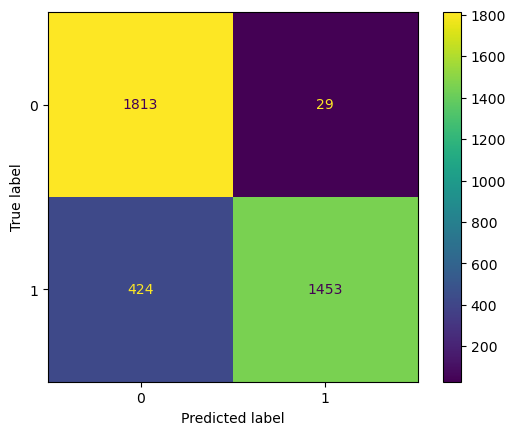

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=16, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:hinge', predictor=None, ...),
 {'Model accuracy score:': 0.8781930626512503,
  'train accuracy score:': 0.9945538895986015,
  'Confusion Matrix:': array([[1813,   29],
         [ 424, 1453]], dtype=int64),
  'Precision:': 0.9804318488529015,
  'Recall': 0.7741076

In [78]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_evaluate_xgboost(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn, xgb_params)

### objective='reg:logistic'

In [79]:
xgb_params = {
     'objective': 'binary:logistic',
     'max_depth': 16,
     'learning_rate': 0.01,
     'n_estimators': 400,
     'gamma': 0.1,
     'subsample': 0.9,
     'colsample_bytree': 0.7
 }

### smote

              precision    recall  f1-score   support

without risk       0.79      0.99      0.88      6837
   with risk       0.99      0.74      0.85      7062

    accuracy                           0.86     13899
   macro avg       0.89      0.87      0.86     13899
weighted avg       0.89      0.86      0.86     13899



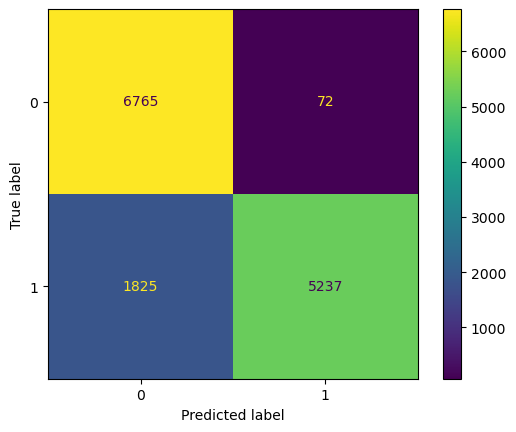

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=16, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 {'Model accuracy score:': 0.8635153608173249,
  'train accuracy score:': 0.9129777857721018,
  'Confusion Matrix:': array([[6765,   72],
         [1825, 5237]], dtype=int64),
  'Precision:': 0.9864381239404785,
  'Recall': 0.74157462475219

In [80]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_evaluate_xgboost(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote, xgb_params)

### smote ENN

              precision    recall  f1-score   support

without risk       0.80      0.99      0.89      1842
   with risk       0.99      0.76      0.86      1877

    accuracy                           0.88      3719
   macro avg       0.90      0.88      0.87      3719
weighted avg       0.90      0.88      0.87      3719



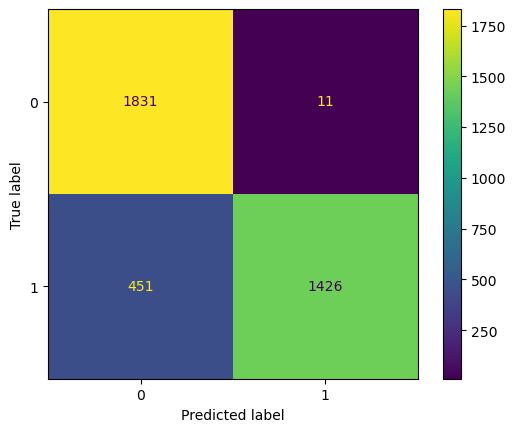

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=16, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 {'Model accuracy score:': 0.8757730572734606,
  'train accuracy score:': 0.9760640086061991,
  'Confusion Matrix:': array([[1831,   11],
         [ 451, 1426]], dtype=int64),
  'Precision:': 0.9923451635351427,
  'Recall': 0.75972296217368

In [81]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_evaluate_xgboost(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn, xgb_params)

### objective='binary:logitraw'

In [85]:
xgb_params = {
     'objective': 'binary:logitraw',
     'max_depth': 16,
     'learning_rate': 0.01,
     'n_estimators': 400,
     'gamma': 0.1,
     'subsample': 0.9,
     'colsample_bytree': 0.7
 }

### smote

              precision    recall  f1-score   support

without risk       0.78      1.00      0.88      6837
   with risk       1.00      0.73      0.84      7062

    accuracy                           0.86     13899
   macro avg       0.89      0.86      0.86     13899
weighted avg       0.89      0.86      0.86     13899



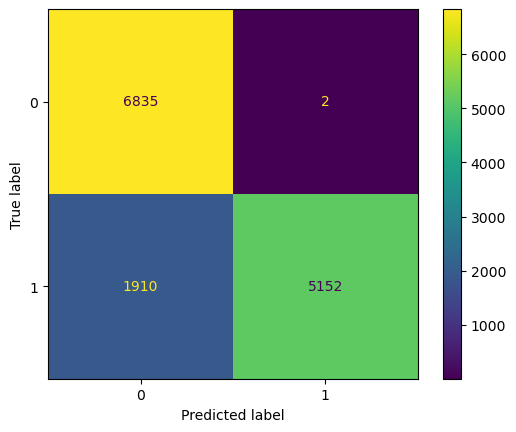

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=15, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:logitraw', predictor=None, ...),
 {'Model accuracy score:': 0.8624361464853587,
  'train accuracy score:': 0.8747908984620919,
  'Confusion Matrix:': array([[6835,    2],
         [1910, 5152]], dtype=int64),
  'Precision:': 0.9996119518820333,
  'Recall': 0.7295

In [83]:
# x_smote, y_smote      X_train_smote, X_val_smote, y_train_smote, y_val_smote
train_evaluate_xgboost(x_smote, y_smote, X_train_smote, y_train_smote, X_val_smote, y_val_smote, xgb_params)

### smote ENN

              precision    recall  f1-score   support

without risk       0.79      1.00      0.88      1842
   with risk       1.00      0.74      0.85      1877

    accuracy                           0.87      3719
   macro avg       0.90      0.87      0.87      3719
weighted avg       0.90      0.87      0.87      3719



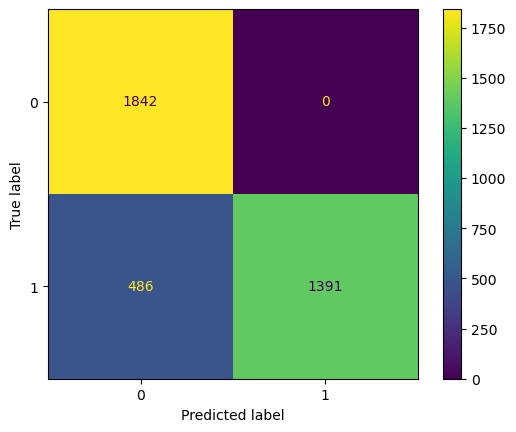

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.01, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=16, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=400, n_jobs=None, num_parallel_tree=None,
               objective='binary:logitraw', predictor=None, ...),
 {'Model accuracy score:': 0.8693197095993547,
  'train accuracy score:': 0.9121898742688093,
  'Confusion Matrix:': array([[1842,    0],
         [ 486, 1391]], dtype=int64),
  'Precision:': 1.0,
  'Recall': 0.7410761854022376,
 

In [86]:
#  X_resample_enn, y_resample_enn      X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
train_evaluate_xgboost(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn, xgb_params)

## best XGBoost model evaluation and visualisation

In [88]:
xgb_params = {
     'objective': 'binary:logistic',
     'max_depth': 16,
     'learning_rate': 0.01,
     'n_estimators': 400,
     'gamma': 0.1,
     'subsample': 0.9,
     'colsample_bytree': 0.7
 }

              precision    recall  f1-score   support

without risk       0.80      0.99      0.89      1842
   with risk       0.99      0.76      0.86      1877

    accuracy                           0.88      3719
   macro avg       0.90      0.88      0.87      3719
weighted avg       0.90      0.88      0.87      3719



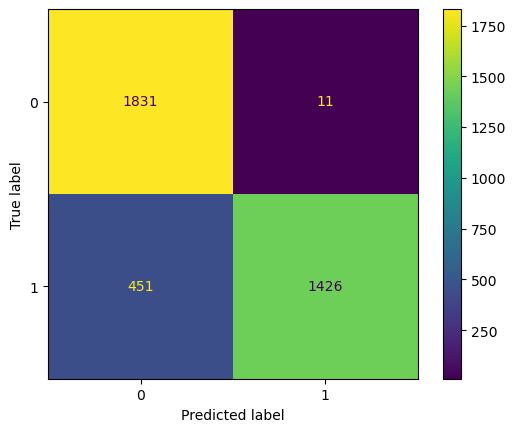

In [89]:
xgb_clf , results = train_evaluate_xgboost(X_resample_enn, y_resample_enn, X_train_smoteenn, y_train_smoteenn, X_val_smoteenn, y_val_smoteenn, xgb_params)

### roc curve

random pred is  0.5
dt test auc 0.9051319562426933


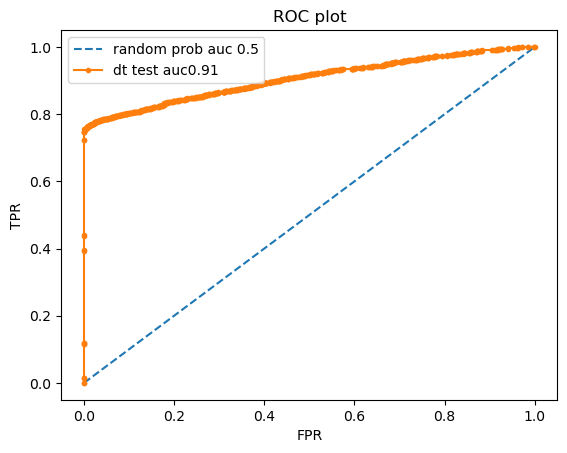

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Roc curve
r_probs = [0 for i in range(len(y_val_smoteenn))]
dt_prob_test = xgb_clf.predict_proba(X_val_smoteenn)

dt_prob_test = dt_prob_test[:,1]

r_auc = roc_auc_score(y_val_smoteenn,r_probs)
dt_auc_test = roc_auc_score(y_val_smoteenn,dt_prob_test)

print('random pred is ',r_auc)
print('dt test auc',dt_auc_test)

#step 2 (calc ROC curve)
r_fpr,r_tpr,i = roc_curve(y_val_smoteenn,r_probs)
r_fpr1,r_tpr1,i = roc_curve(y_val_smoteenn,dt_prob_test)


# step 3 (plot)
plt.plot(r_fpr,r_tpr,label = f"random prob auc {r_auc}",linestyle = '--')
plt.plot(r_fpr1,r_tpr1,label = f'dt test auc{round(dt_auc_test,2)}',marker = '.')

plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

### learning curve

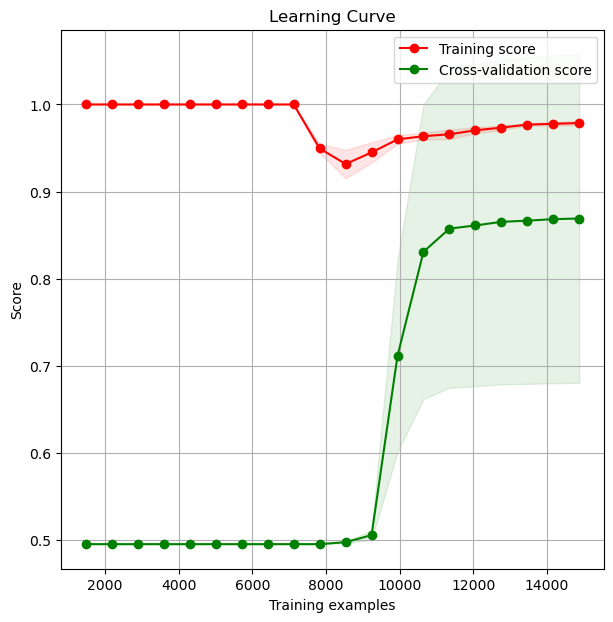

In [96]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 20)

train_sizes, train_scores, test_scores = learning_curve(
    xgb_clf, X_resample_enn, y_resample_enn, train_sizes=train_sizes, cv=5, scoring='accuracy', n_jobs=-1
    )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(7, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()

plt.show()


## Feature importance

### importance type weight 

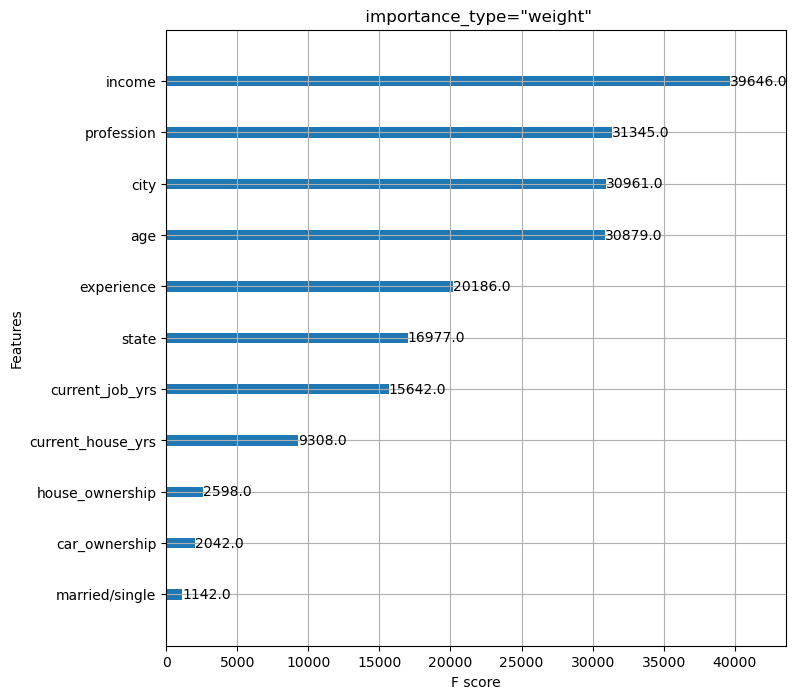

In [116]:
import xgboost as xgb

xgb.plot_importance(xgb_clf, importance_type='weight')
plt.rcParams['figure.figsize'] = [8, 8]
plt.title(' importance_type="weight"')
plt.show()


### importance type cover

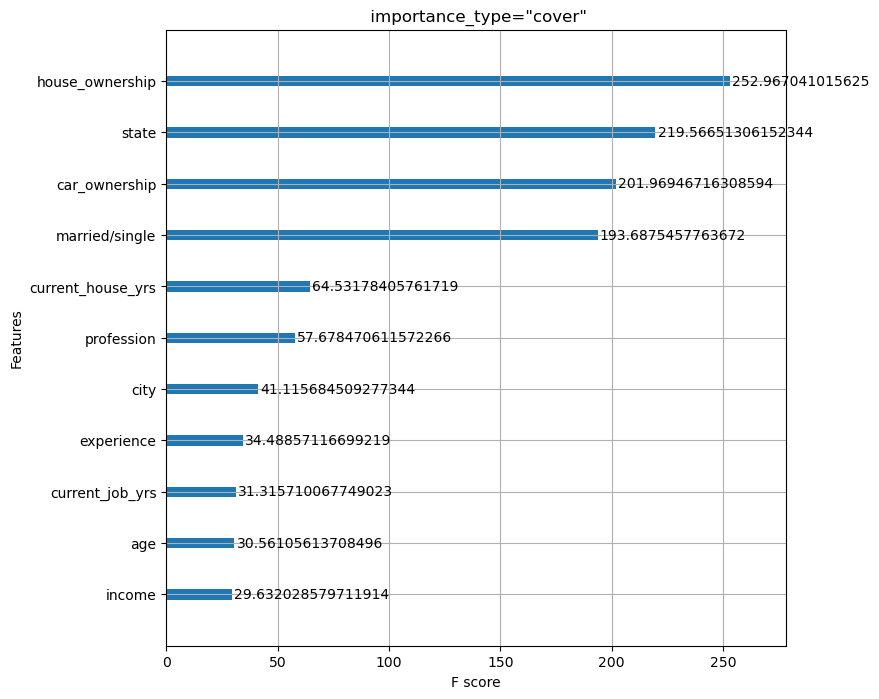

In [117]:
xgb.plot_importance(xgb_clf, importance_type='cover')
plt.rcParams['figure.figsize'] = [8, 8]
plt.title(' importance_type="cover"')
plt.show()

### importance type gain

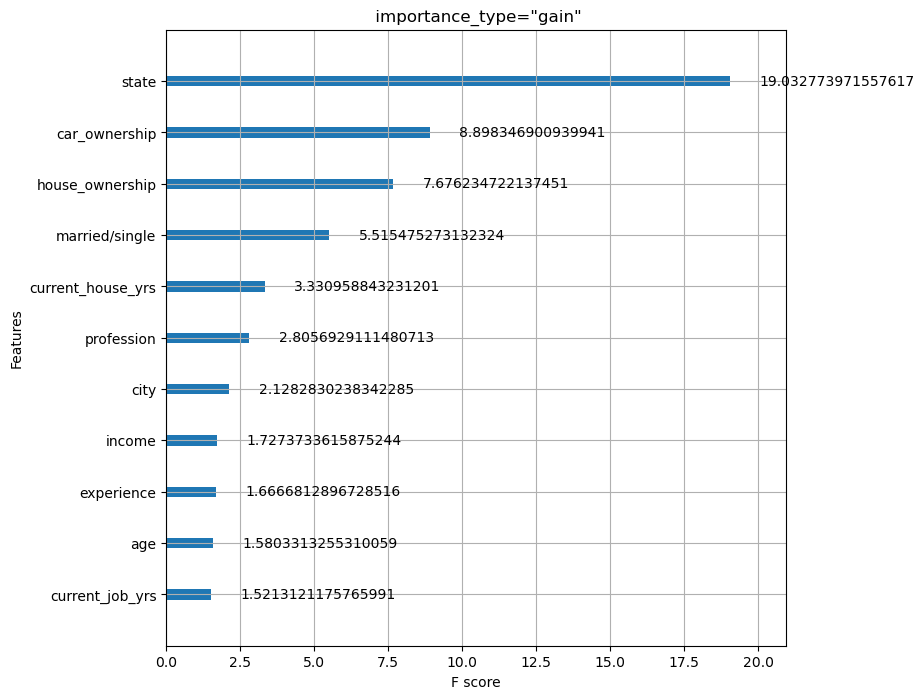

In [118]:
xgb.plot_importance(xgb_clf, importance_type='gain')
plt.rcParams['figure.figsize'] = [8, 8]
plt.title(' importance_type="gain"')
plt.show()

### test XGBoost with removing the least contributing features

#### removing these feature to check model acuuracy
[current_job_yrs , house_ownership]

In [70]:
X_train_smoteenn2 = X_train_smoteenn.copy()
X_val_smoteenn2 = X_val_smoteenn.copy()

In [72]:
#X_train_smoteenn, X_val_smoteenn, y_train_smoteenn, y_val_smoteenn
X_train_smoteenn2.drop(["current_job_yrs" , "house_ownership"], axis = 1,inplace = True)
X_val_smoteenn2.drop(["current_job_yrs" , "house_ownership"], axis = 1,inplace = True)

In [76]:
xgb_params2 = {
     'objective': 'binary:logistic',
     'max_depth': 16,
     'learning_rate': 0.01,
     'n_estimators': 400,
     'gamma': 0.1,
     'subsample': 0.9,
     'colsample_bytree': 0.7
 }

              precision    recall  f1-score   support

without risk       0.81      1.00      0.89      1837
   with risk       0.99      0.76      0.86      1830

    accuracy                           0.88      3667
   macro avg       0.90      0.88      0.88      3667
weighted avg       0.90      0.88      0.88      3667



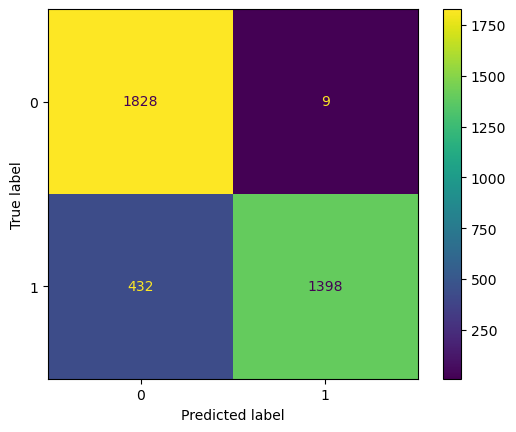

In [77]:
xgb_clf2 = train_evaluate_xgboost(X_resample_enn, y_resample_enn, X_train_smoteenn2, y_train_smoteenn, X_val_smoteenn2, y_val_smoteenn, xgb_params2)

## Explainable AI

### SHAP values

In [115]:
import shap

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_val_smoteenn)
shap.initjs()

In [119]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X_val_smoteenn.iloc[0, :])

In [120]:
shap.force_plot(
    explainer.expected_value, shap_values[:, :], X_val_smoteenn.iloc[:, :]
)

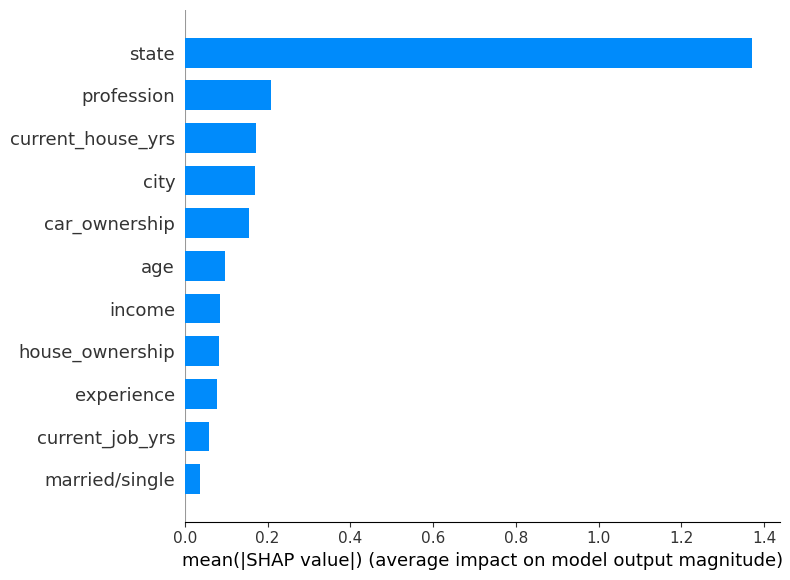

In [121]:
shap.summary_plot(shap_values, X_val_smoteenn, plot_type="bar")

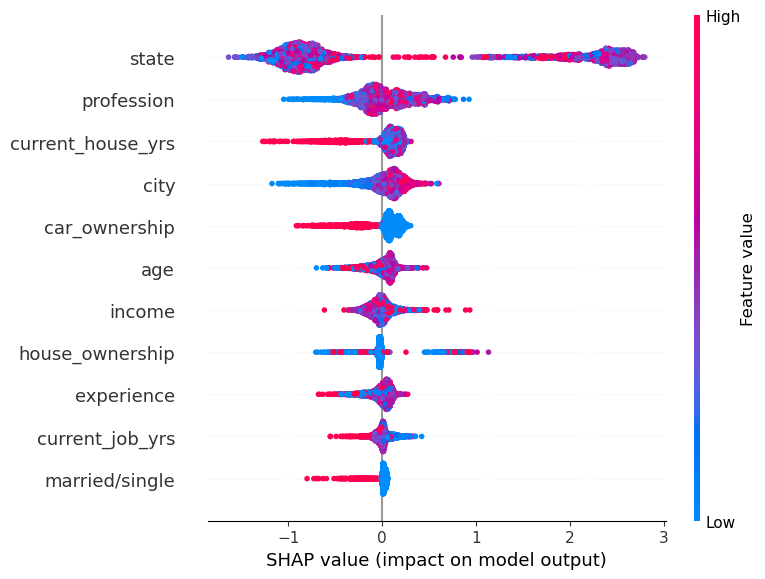

In [122]:
shap.summary_plot(shap_values, X_val_smoteenn)

#### the summary plot of all records based on shap values is showing the contribution and the direction of it for all features in the descending order

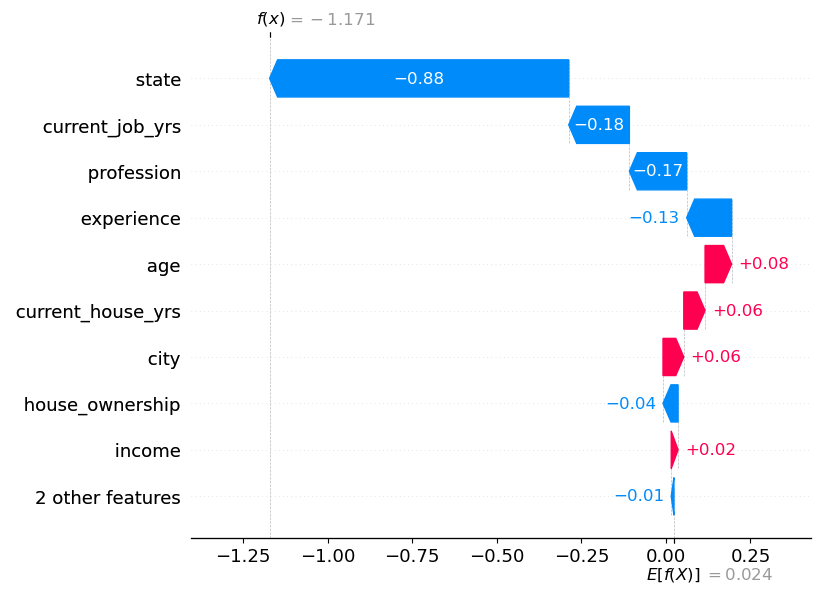

In [123]:
# record 1   class 0
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0, :], X_val_smoteenn.iloc[0, :])

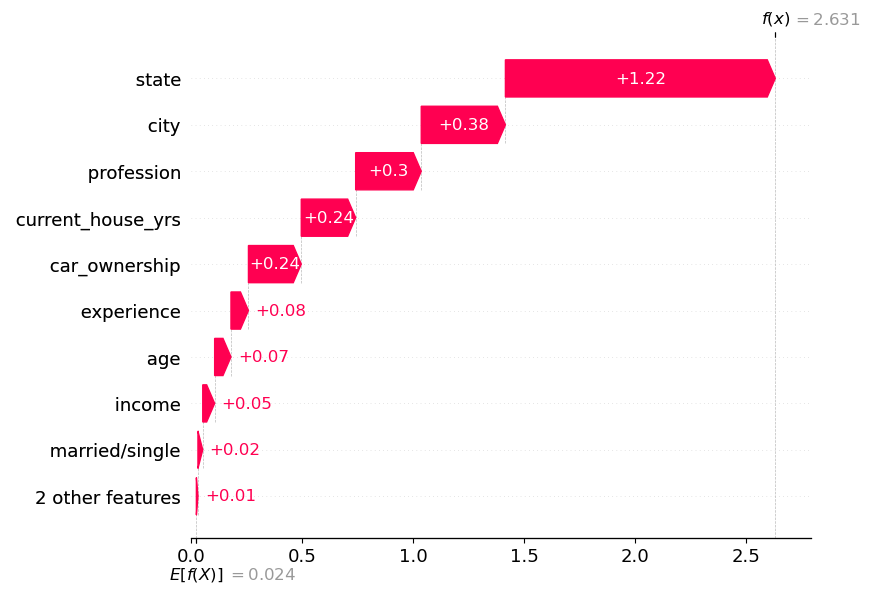

In [127]:
# record 2 class 1
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[3, :], X_val_smoteenn.iloc[3, :])

#### we can see that for the first record with the class of 0 ;what is predicted is most effected by the values of "state", "current_ojb_yr" and "profession".
#### in the other hand the second record with the class of 1 ;what is predicted is most effected by the values of "state", "city" and "profession".